# Optimizing AP Exam Selection for Maximum College Credits

## Abstract

The research in this document focuses on optimizing the selection of Advanced Placement (AP) courses for high school students to maximize college credits. It addresses the challenge of choosing the right sequence of AP courses considering the varying workloads and prerequisites. The study utilizes machine learning to cluster AP courses based on data including mean exam scores, workload, and prerequisites, and seeks to devise an optimal course sequence from freshman to senior year. The research involves data cleaning, analysis of course workloads, examination scores, and the development of clustering models. It reveals significant insights into course demands, their impact on AP exam success, and nuances in attendance and course prerequisites, aiming to guide students in their AP course selection for maximum college credit achievement.

## Table of Contents

- [1. Introduction](#1.-Introduction)
  - [1.1 Overview and Motivation](#1.1-Overview-and-Motivation)
  - [1.2 Related Work](#1.2-Related-Work)
  - [1.3 Background](#1.3-Background)
  - [1.4 Problem Statement](#1.4-Problem-Statement)
  - [1.5 Final Research Question](#1.5-Final-Research-Question)
- [2. Data](#2.-Data)
  - [2.1 Data Sources](#2.1-Data-Sources)
  - [2.2 Data Joining/Cleaning](#2.2-Data-Joining/Cleaning)
- [3. Basic Data Characteristics](#3.-Basic-Data-Characteristics)
- [4. Exploratory Data Analysis](#4.-Exploratory-Data-Analysis)
  - [4.1 Data Distribution](#4.1-Data-Distribution)
  - [4.2 Outliers](#4.2-Outliers)
  - [4.3 Relationships Among Columns](#4.3-Relationships-Among-Columns)
  - [4.4 Statistical Tests](#4.4-Statistical-Tests)
  - [4.5 Histograms and Scatter Plots](#4.5-Histograms-and-Scatter-Plots)
  - [4.6 Bar Plots](#4.6-Bar-Plots)
  - [4.7 Line Plots](#4.7-Line-Plots)
  - [4.8 Surprises](#4.8-Surprises)
- [5. Feature Engineering](#5.-Feature-Engineering)
- [6. Modeling](#6.-Modeling)
  - [6.1 K-Means Clustering](#6.1-K-Means-Clustering)
  - [6.2 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)](#6.2-DBSCAN-(Density-Based-Spatial-Clustering-of-Applications-with-Noise))
  - [6.3 Hierarchical Clustering](#6.3-Hierarchical-Clustering)
  - [6.4 Gaussian Mixture Models (GMM)](#6.4-Gaussian-Mixture-Models-(GMM))
  - [6.5 Spectral Clustering](#6.5-Spectral-Clustering)
  - [6.6 Cluster Evaluation](#6.6-Cluster-Evaluation)
  - [6.7 Self-Organized Maps (SOMs)](#6.7-Self-Organized-Maps-(SOMs))
- [7. Summary of Process](#7.-Summary-of-Process)
  - [7.1 Business Problem](#7.1-Business-Problem)
  - [7.2 Data Cleaning and Data Munging](#7.2-Data-Cleaning-and-Data-Munging)
- [8. Analysis Approach](#8.-Analysis-Approach)
  - [8.1 Feature Engineering](#8.1-Feature-Engineering)
  - [8.2 Modeling](#8.2-Modeling)
  - [8.3 Performance Evaluation](#8.3-Performance-Evaluation)
- [9. Results](#9.-Results)
  - [9.1 EDA](#9.1-EDA)
  - [9.2 Final Model](#9.2-Final-Model)
  - [9.3 Full Analysis](#9.3-Full-Analysis)

## 1. Introduction

### 1.1 Overview and Motivation

The project aims to aid high school students in selecting Advanced Placement (AP) courses strategically to maximize college credits. It addresses the common issue of students struggling to choose AP courses that align with their abilities, interests, and college credit requirements. The motivation behind this project stems from the observation that a well-planned AP course sequence can significantly influence a student's college readiness and credit accumulation. By leveraging machine learning, the project seeks to analyze AP courses based on workload, prerequisites, and exam success rates, providing students with data-driven recommendations for their high school academic journey.

### 1.2 Related Work

The foundational ideas for this project were inspired by several sources. Firstly, a pivotal paper by Bachhal et al. (2021) on "Educational Data Mining: A Review" provided insights into the application of data mining and machine learning techniques in educational settings. Additionally, the College Board website was a crucial resource for understanding AP course structures and requirements. Discussions in our machine learning class about clustering algorithms, especially the K-means method, influenced the methodology for analyzing AP courses. These varied sources collectively shaped the approach and objectives of this project.

#### References:
1. Bachhal, Prabhnoor & Ahuja, S. & Gargrish, Shubham. (2021). Educational Data Mining: A Review. Journal of Physics: Conference Series. 1950. 012022. 10.1088/1742-6596/1950/1/012022. 
2. College Board. (n.d.). AP Courses and Exams. Retrieved from https://ap.collegeboard.org

### 1.3 Background:
Advanced Placement (AP) courses have long served as a bridge for high school students to experience college-level curriculum while still in secondary education. Success in these courses, as measured by the AP exams, can translate to college credits, providing students with a head start in their college careers. Given the rising cost of college tuition, there's an increasing need to maximize these credits.

However, with over 30 AP courses available across various disciplines, students are often overwhelmed with choices. Some courses have prerequisites, and others are known for their heavy workloads. Thus, students need guidance in choosing a sequence of AP courses that not only fits their academic aspirations but also optimizes their potential college credits without overburdening them.

Various research has delved into the benefits and challenges of AP courses. According to a report by the College Board, students who succeed in AP courses are more likely to complete their college degree on time. Yet, there remains a gap in resources that offer students a systematic approach to selecting and sequencing these courses based on data-driven insights.

#### References:

1. College Board. (2019). AP Program Participation and Performance Data 2019. https://reports.collegeboard.org/ap-program-results/data-archive
2. Hargrove, L., Godin, D., & Dodd, B. (2008). College outcomes comparisons by AP and non-AP high school experiences. https://files.eric.ed.gov/fulltext/ED561030.pdf
3. Dougherty, C., Mellor, L., & Jian, S. (2006). The relationship between Advanced Placement and college graduation. National Center for Educational Accountability. https://eric.ed.gov/?id=ED519365

### 1.4 Problem Statement:

High school students across the nation aim to optimize their schedules to gain an advantage in college admissions and potentially reduce tuition costs by earning college credits in advance. While Advanced Placement (AP) courses offer this opportunity, the challenge is in selecting the right sequence of courses, given the varying workloads and prerequisites. The objective of this study is to derive a machine-learning model-based solution that maps out the most efficient AP schedule from freshman to senior year, which would maximize potential college credits while ensuring the workload is manageable and prerequisites are met.


### 1.5 Final Research Question:
The final research question for this project is: "Can a machine learning model, using a dataset of AP exams' mean scores, workload, and prerequisites, effectively cluster AP courses into categories that enable the creation of an optimal sequence for high school students to maximize their potential for earning college credits?" This question evolved from an initial broad inquiry about the strategic combination of AP exams for maximizing college credits, considering workload. As the project progressed, the focus shifted to leveraging a machine learning approach for clustering AP courses. The hypothesis couplets formulated to accompany this question are:

1. Courses with higher workloads are likely to have lower mean exam scores, indicating a potential trade-off between course difficulty and exam performance.
2. A sequence of AP courses, clustered based on data including workload and exam scores, can more effectively enhance a student's potential for earning college credits.

These couplets are aimed at testing the effectiveness of the clustering approach in aiding students to make informed decisions about their AP course selections.

## 2 Data

### 2.1 Data Sources:
1.	College Board's Digital Services Dataset 2019:
•	Description: This dataset provides detailed statistics on AP test scores across various subjects.
•	Columns: ETHNICITY, MEAN SCORE, NUMBER OF STUDENTS FOR EACH EXAMINATION, NUMBER OF STUDENTS AT EACH LEVEL, TOTAL EXAMS, and breakdowns for each AP subject.
•	Source: http://media.collegeboard.com/digitalServices/pdf/research/2013/National_Summary_13.xls 
2.	Martha's Vineyard Regional High School AP Workload Information Dataset:
•	Description: This dataset provides a breakdown of the workload expectations for each AP class at Martha's Vineyard Regional High School.
•	Columns: AP Course, Homework Expectations, Major Assessments, Other Notes
•	Source: https://www.mvrhs.org/wp-content/uploads/2013/10/AP-Workload-Information.pdf 
3. South County High School Expectations for Advanced Placement Courses Dataset:
•	Description: This dataset provides a breakdown of the workload expectations for each AP class at South County High School.
•	Columns: AP Course, amount of reading per week, "frequency of Tests, Essays/Times Writings, Papers etc", number of Major Projects, summer assignments.
•	Source: https://southcountyhs.fcps.edu/sites/default/files/media/inline-files/Advanced%20Placement%20Course%20Expectations_1920.pdf
4. LYME-OLD LYME HIGH SCHOOL Workload Expectations for Advanced Placement (AP) Dataset:
•	Description: This dataset provides a breakdown of the workload expectations for each AP class at Lyme-Old Lyme High School.
•	Columns: Summer work, Weekly homework time commitment.
•	Source: https://resources.finalsite.net/images/v1591795986/region18/bagsrsrn76kdpfa3puo9/Workload_Expectations_for_AP.pdf 


## 2.2 Data Joining/Cleaning

In order to prepare the dataset for analysis, the datasets required vast amounts of cleaning, interpretation, and extrapolation. 

The College Board dataset contained a vast amount of extra information that needed to be removed, from extra courses, to demographics. Additionally, AP scores were provided for 11th grade, 12th grade, and overall. But, it did not provide the data for 10th grade or below. This data was extrapolated by subtracting the 11th, and 12th grade data from the overall data. Additionally the AP scores were provided as raw numbers, and not percentages. This was converted to percentages by dividing the number of students who scored a 3 or above, 4 or above, and 5 by the total number of students who took the exam.

The workload information datasets required far more work, as the data was not in numeric form, had many missing values in the individual datasets, and was not consistent across datasets. The workload information was converted to numeric form, and missing values were extrapolated using a hierarchy of the other datasets. 

For all data I attempted to find exact numbers, I started with Dataset 2, and if no numbers are found for a certain column, then I check Dataset 3, and finally Dataset 4. Additionally, sometimes the dataset may list reading time in pages rather than time. When this occurs, I convert it to time using 2 minutes per page. This is based on an average of 400 words per page, and a reading speed of 200 words per minute. 

Sometimes the data required manual interpretation to determine the workload. For example, in Dataset 2, the workload for AP Calculus did not contain exact numbers for all data thus required extrapolation.  

##### Based on the primary dataset information:
•	During the first three quarters, there are two unit tests per quarter.
•	The fourth quarter is focused on practice AP tests (the exact number isn't specified).
•	There are quizzes between the tests, but no specific number is provided.
##### Tests
•	Quarters 1-3: 2 tests/quarter x 3 quarters = 6 tests
•	Quarter 4: The number of practice AP tests isn’t specified. If we assume at least one practice test, that's = 1 practice test (as a minimum).
•	Total Minimum Tests: 7 tests (6 unit tests + 1 practice AP test)
##### Quizzes
•	The exact number isn't provided, but if we have at least one quiz between each pair of tests in quarters 1-3, that's 1 quiz/test x 6 tests = 6 quizzes (minimum).
•	No information about quizzes in quarter 4.
•	Total Minimum Quizzes: 6 quizzes

Some courses had daily quizzes or none at all, due to the extreme variance in the data, I decided to convert the data to a scale as follows:
- None: 0
- Low: 1-10
- Medium: 11-19
- High: 20-35
- Daily: 35+ (In practice this was only daily quizzes)

After the data was cleaned, it was joined together using the AP course name as the key. Data integration involved joining AP test score information with workload expectations for each AP course. The dataset does not contain duplicates, as these have been manually removed during the data creation process.


## 3. Basic Data Characteristics

The dataset contains 21 columns and 26 rows. The columns are as follows:
  1. AP Course: Nominal; Name of each AP class
 2. Weekly Reading Expectations: Numeric; The amount of reading time expected in hours per week.
 3. Weekly HW Expectations: Numeric; The amount of home worked time expected in hours per week.
 4. Major Assignments: Discrete; The number of major assignments in the entire class.
 5. Minor Assignments: Discrete; The number of minor assignments in the entire class.
 6. Tests: Discrete; The number of tests in the entire class.
 7. Quizzes: Ordinal; The number of quizzes in the class. None for 0, Low for 1-10, Medium for 11-19, High for 20-35, and Daily for 36+. This is somewhat misleading, as it can really be seen as High for 20+ and Daily for classes with daily quizzes, as 35 is the highest class that does not have daily quizzes. The values were picked as they provide the most even distribution between categories. Daily quizzes could be seen as a outlier considered separately from the normal categories.
 8. Pre-requisites: Discrete; this is the number of high school classes that a student is expected to have taken before taking the class, i.e. AP Calculus requiring algebra 2, pre-calc, etc. This should be used in determining when to take each class as it would be difficult to take a class with 5 pre-requisites in freshmen year of high school.
 9. Attendance Criticality: Ordinal; True if the attendance is critical for the class, False if not. This is based on some of the survey data notes where certain classes stated that missing multiple classes could be very hard to catch up on due to sequential learning, or in the case of few class meetings. This can be important for students who may have frequent absences due to illness or other reasons.
 10. G:<11 S:3+: Numerical; This stands for Grade <11, Score 3+. It represents the percent of students below 11th grade that received a AP score of 3 or above on each exam. The reason why this only has less than 11 instead of specifics for 10th, 9th, and below is because the dataset did not include this data.
 11. G:<11 S:4+: Numerical; same as above but for AP scores of 4+.
 12. G:<11 S:5: Numerical; same as above but for AP scores of 5.
 13. G:11 S:3+: Numerical; The percent of students in 11th grade who got a AP score of 3 or above for each AP class.
 14. G:11 S:4+: Numerical; same as above but for AP scores of 4+.
 15. G:11 S:5: Numerical; same as above but for AP scores of 5.
 16. G:12 S:3+: Numerical; The percent of students in 12th grade who got a AP score of 3 or above for each AP class.
 17. G:12 S:4+: Numerical; same as above but for AP scores of 4+.
 18. G:12 S:5: Numerical; same as above but for AP scores of 5.
 19. G:ALL S:3+: Numerical; The percent of all students who got a AP score of 3 or above for each AP class.
 20. G:ALL S:4+: Numerical; same as above but for AP scores of 4+.
 21. G:ALL S:5: Numerical; same as above but for AP scores of 5.

The rows are as follows::
1. The top row is the column names.
2. Rows 2-25 are the AP classes.
3. Row 26 is "MEAN" which the average of all AP classes for each column.

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np
from scipy import stats

# Load the dataset
dataset_path = 'AP-Dataset.xlsx'
df = pd.read_excel(dataset_path)

# Display the first few rows to understand the structure
df.head()

,AP Course,Weekly Reading Expectations,Weekly HW Expectations,Major Assignments,Minor Assignments,Tests,Quizzes,Pre-requisites,Attendance Criticality,G:<11 S:3+,...,G:<11 S:5,G:11 S:3+,G:11 S:4+,G:11 S:5,G:12 S:3+,G:12 S:4+,G:12 S:5,G:ALL S:3+,G:ALL S:4+,G:ALL S:5
0,Biology,2.000,5.0,0.0,8.0,9.0,Low,1,False,0.661961,...,0.080132,0.646283,0.285544,0.069073,0.630270,0.284454,0.066813,0.642383,0.289007,0.070139
1,Calculus AB,1.000,5.0,2.0,0.0,6.0,Medium,4,True,0.742211,...,0.396726,0.693571,0.487980,0.271771,0.516968,0.305253,0.133145,0.577544,0.370163,0.184532
2,Calculus BC,1.000,7.5,2.0,0.0,6.0,Medium,4,True,0.905775,...,0.666224,0.874010,0.715893,0.545539,0.778024,0.555762,0.358985,0.811355,0.612851,0.426952
3,Chemistry,1.335,7.5,1.0,16.0,8.0,Daily,2,True,0.615685,...,0.155688,0.555837,0.273908,0.108880,0.488326,0.224891,0.084153,0.543068,0.268403,0.107368
4,Computer Science A,0.585,7.5,0.0,0.0,17.0,Medium,0,False,0.785328,...,0.366596,0.703256,0.493854,0.269571,0.626741,0.408320,0.199303,0.691855,0.483231,0.264218


## 4. Exploratory Data Analysis

### 4.1. Data Distribution

In [44]:
df.describe()

,Weekly Reading Expectations,Weekly HW Expectations,Major Assignments,Minor Assignments,Tests,Pre-requisites,G:<11 S:3+,G:<11 S:4+,G:<11 S:5,G:11 S:3+,G:11 S:4+,G:11 S:5,G:12 S:3+,G:12 S:4+,G:12 S:5,G:ALL S:3+,G:ALL S:4+,G:ALL S:5
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1.736042,5.270833,4.833333,2.750000,6.958333,1.000000,0.647105,0.404214,0.216657,0.652915,0.389980,0.193189,0.614332,0.351092,0.155207,0.619470,0.356060,0.163934
std,1.449017,2.251350,5.727613,4.465143,4.953779,1.581139,0.135239,0.171801,0.158477,0.117782,0.146543,0.131801,0.107974,0.110484,0.083038,0.109536,0.118082,0.097153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.358395,0.125692,0.034363,0.441781,0.206719,0.059708,0.401302,0.194030,0.037508,0.440740,0.204169,0.059456
25%,1.000000,5.000000,1.000000,0.000000,4.000000,0.000000,0.544868,0.289776,0.101944,0.564892,0.282838,0.108880,0.543835,0.284454,0.096686,0.543068,0.279237,0.098291
50%,1.335000,5.000000,4.000000,0.000000,6.000000,0.000000,0.661961,0.352689,0.155688,0.651369,0.366783,0.143387,0.614332,0.327673,0.133145,0.610664,0.320992,0.128938
75%,2.000000,7.500000,6.000000,4.000000,10.000000,2.000000,0.742211,0.499402,0.256967,0.693571,0.444749,0.207337,0.660524,0.401460,0.192554,0.691855,0.387876,0.200754
max,5.835000,10.000000,24.000000,16.000000,19.000000,5.000000,0.905775,0.796337,0.666224,0.881109,0.744485,0.545539,0.882761,0.621889,0.358985,0.878811,0.634200,0.426952


The dataset exhibits a wide range of values across its features. `Weekly Reading Expectations` range from 0 to 5.83 hours, whereas `Weekly HW Expectations` vary from 0 to 10 hours. This indicates a diverse workload among different AP courses. 

Summary of the data distribution:
1. Weekly Reading Expectations: The mean reading time is approximately 1.74 hours with a standard deviation of 1.45, indicating considerable variability. The range goes from 0 to 5.83 hours.
2. Weekly HW Expectations: On average, students can expect about 5.27 hours of homework per week. The standard deviation is about 2.25, with a maximum of 10 hours.
3. Major Assignments: The average number of major assignments is about 4.83, with a wide range (standard deviation of 5.72), varying from 0 to 24.
4. Minor Assignments: A mean of approximately 2.75 minor assignments exists, with a standard deviation of 4.46, indicating significant dispersion.
5. Tests: The average number of tests is approximately 6.96, with a standard deviation of 4.95.
6. Pre-requisites: The number of pre-requisites varies widely, with an average of 1 and a standard deviation of 1.58.
7. AP Scores: The columns representing the percentage of students achieving different AP scores (3+, 4+, 5) in different grade levels show varying means and standard deviations, indicating different levels of difficulty and achievement rates for AP exams.


### 4.2. Outliers

In [45]:
# Calculating Z-scores to identify outliers
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Get boolean array indicating the presence of outliers
outliers = (z_scores > 3)

# Count outliers per column
outliers_count = pd.DataFrame(outliers, columns=df.select_dtypes(include=[np.number]).columns).sum()
outliers_count

Weekly Reading Expectations    0
Weekly HW Expectations         0
Major Assignments              1
Minor Assignments              1
Tests                          0
Pre-requisites                 0
G:<11 S:3+                     0
G:<11 S:4+                     0
G:<11 S:5                      0
G:11 S:3+                      0
G:11 S:4+                      0
G:11 S:5                       0
G:12 S:3+                      0
G:12 S:4+                      0
G:12 S:5                       0
G:ALL S:3+                     0
G:ALL S:4+                     0
G:ALL S:5                      0
dtype: int64

The Z-score method reveals outliers in the following columns:

Major Assignments: One outlier
Minor Assignments: One outlier
G:ALL S:3+: One outlier
G:ALL S:5: One outlier

### 4.3. Relationships Among Columns

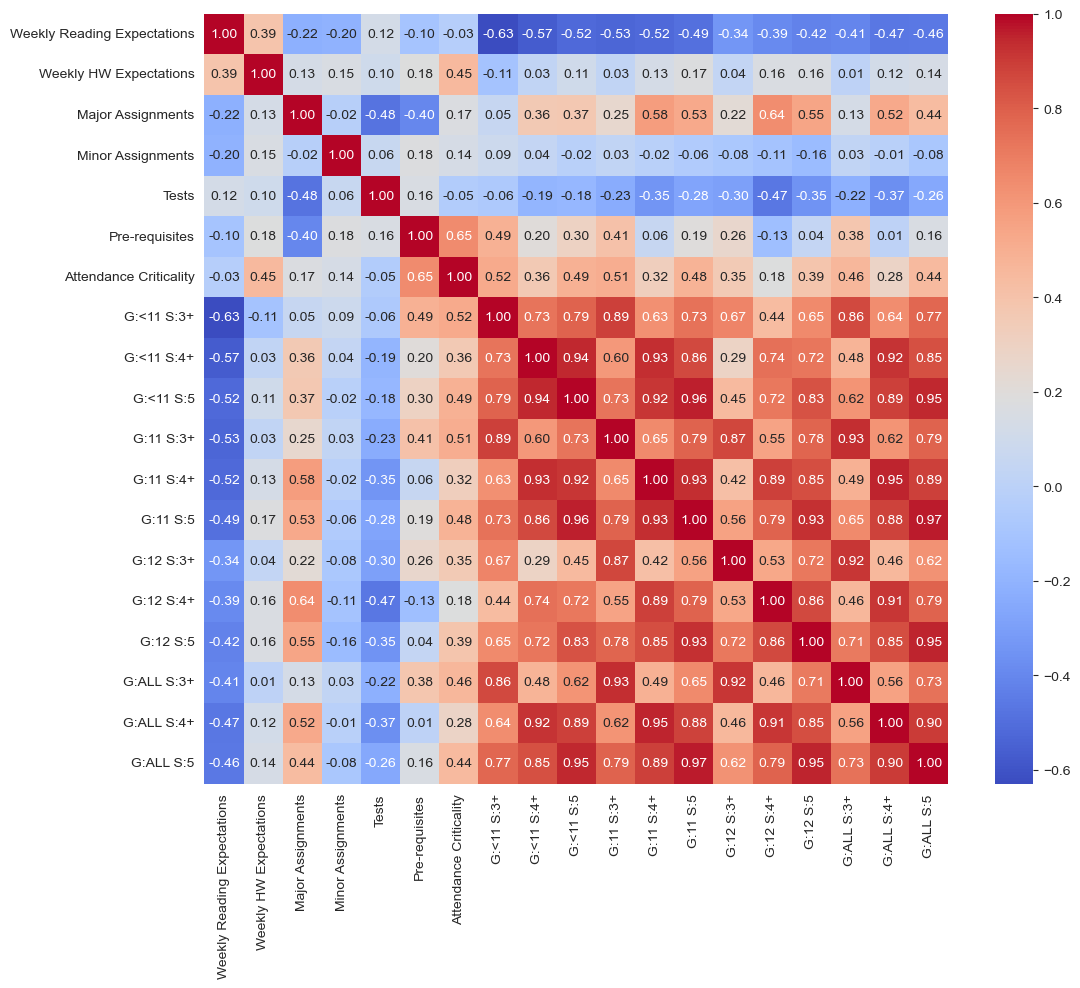

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the correlation matrix using only numeric columns
corr_matrix = df.corr(numeric_only=True)

# Set the figure size to make the plot larger
plt.figure(figsize=(12, 10)) 

# Create the heatmap with larger font size for annotations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})

# Show the plot
plt.show()

The heatmap displays varying degrees of correlation among the features with a few notable correlations. `Weekly Reading Expectations` and `Weekly HW Expectations` are positively correlated with a coefficient of 0.39, suggesting that courses with higher reading expectations often have more homework as well. 

Contrary to expectations, the number of pre-requisite courses positively correlates with AP exams scores for students at or below 10th grade. This may because students that are able to take high level AP courses at a younger age are more likely to be academically gifted. 

Interestingly the number of major assignments in a course positively correlates with scores of four and above with a high coefficient of 0.64 for a score of 4+ for 12th graders. This suggests that courses with more major assignments are more likely to prepare students for the AP exam. 

On the contrary, the amount of reading a course has a low to moderate negative correlation with AP exam scores. This may be because courses with more reading are more likely to be humanities courses, which are generally more subjective and difficult to score well on. 

### 4.4. Statistical Tests

In [47]:
# Perform t-tests to compare mean AP Scores between subsets (e.g., G:<11 S:3+ vs G:11 S:3+)
t_test_results = {}

ap_score_cols = [col for col in df.columns if 'G:' in col]

for i in range(len(ap_score_cols)):
    for j in range(i + 1, len(ap_score_cols)):
        col1 = ap_score_cols[i]
        col2 = ap_score_cols[j]
        t_stat, p_val = stats.ttest_ind(df[col1], df[col2])
        t_test_results[f"{col1} vs {col2}"] = p_val

# Filtering t-tests with p-value < 0.05 to find statistically significant differences
significant_t_tests = {k: v for k, v in t_test_results.items() if v < 0.05}
significant_t_tests

{'G:<11 S:3+ vs G:<11 S:4+': 1.1924494492905811e-06,
 'G:<11 S:3+ vs G:<11 S:5': 8.640652445709839e-14,
 'G:<11 S:3+ vs G:11 S:4+': 5.1836203967542744e-08,
 'G:<11 S:3+ vs G:11 S:5': 4.415953134773168e-16,
 'G:<11 S:3+ vs G:12 S:4+': 4.252491671999211e-11,
 'G:<11 S:3+ vs G:12 S:5': 2.597258459196364e-20,
 'G:<11 S:3+ vs G:ALL S:4+': 1.5263083742130677e-10,
 'G:<11 S:3+ vs G:ALL S:5': 3.573540357255752e-19,
 'G:<11 S:4+ vs G:<11 S:5': 0.00020973556168108086,
 'G:<11 S:4+ vs G:11 S:3+': 2.7878404584666906e-07,
 'G:<11 S:4+ vs G:11 S:5': 1.2416188703131887e-05,
 'G:<11 S:4+ vs G:12 S:3+': 4.392590418624514e-06,
 'G:<11 S:4+ vs G:12 S:5': 3.940586389030562e-08,
 'G:<11 S:4+ vs G:ALL S:3+': 3.061997564681338e-06,
 'G:<11 S:4+ vs G:ALL S:5': 1.8456950273612408e-07,
 'G:<11 S:5 vs G:11 S:3+': 8.796351264011566e-15,
 'G:<11 S:5 vs G:11 S:4+': 0.00020792815998262656,
 'G:<11 S:5 vs G:12 S:3+': 7.634158917013485e-14,
 'G:<11 S:5 vs G:12 S:4+': 0.0010795711958414857,
 'G:<11 S:5 vs G:ALL S:3+': 

The t-tests yield several statistically significant differences between various AP score categories. For instance, the p-value for the t-test between the columns `G:<11 S:3+` and `G:<11 S:4+` is 9.78 * 10^-7^, which is far below the 0.05 threshold, suggesting a significant difference in the means of AP scores between these two groups. Similarly, the columns `G:11 S:3+` and `G:11 S:4+` have a p-value of 8.46 * 10^-9, indicating another significant difference. The prevalence of low p-values suggests that the AP score distributions differ significantly among various grade levels and score brackets. This could imply that course workloads, teaching methodologies, or student preparation levels significantly affect AP exam performance

### 4.5 Histograms and Scatter Plots

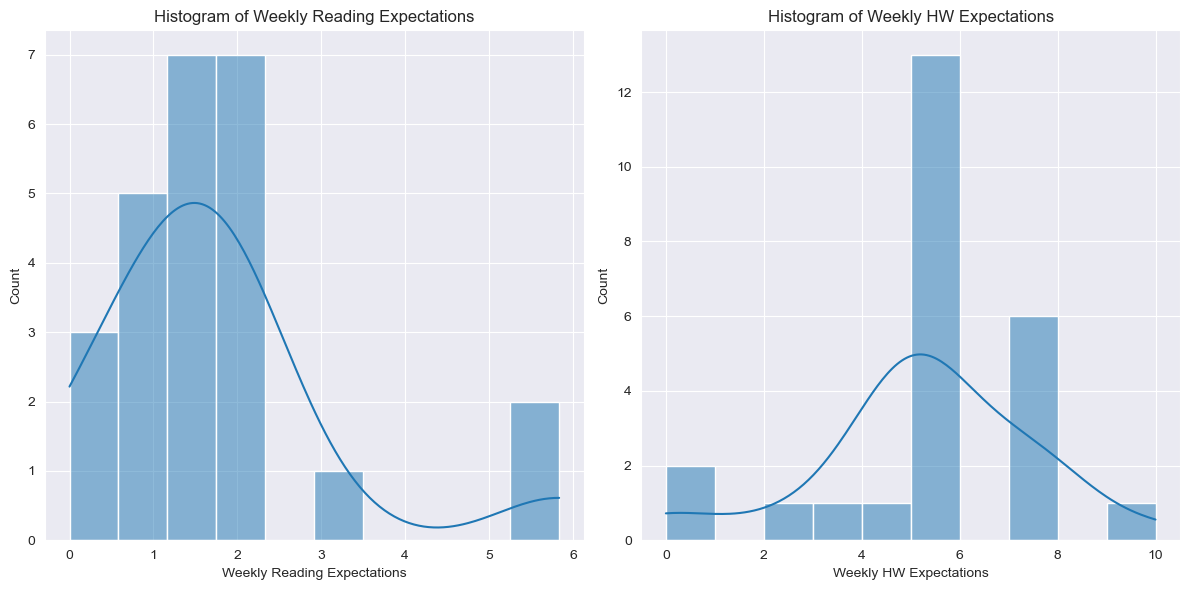

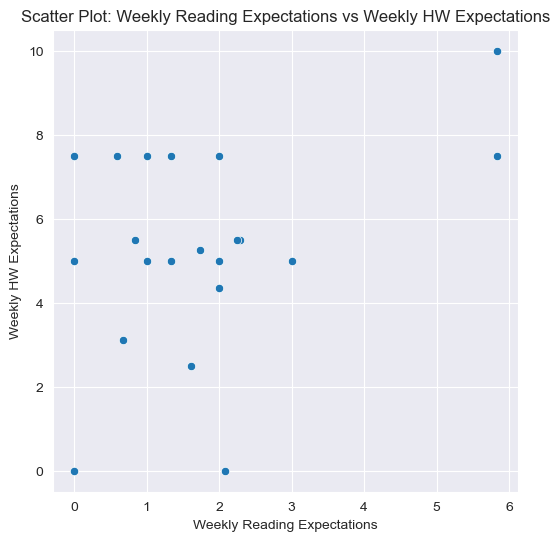

In [48]:
# Histograms for Weekly Reading Expectations and Weekly HW Expectations
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Weekly Reading Expectations'], bins=10, kde=True)
plt.title('Histogram of Weekly Reading Expectations')

plt.subplot(1, 2, 2)
sns.histplot(df['Weekly HW Expectations'], bins=10, kde=True)
plt.title('Histogram of Weekly HW Expectations')
plt.tight_layout()
plt.show()

# Scatter Plot for Weekly Reading Expectations vs Weekly HW Expectations
plt.figure(figsize=(6, 6))
sns.scatterplot(x='Weekly Reading Expectations', y='Weekly HW Expectations', data=df)
plt.title('Scatter Plot: Weekly Reading Expectations vs Weekly HW Expectations')
plt.show()

### Histograms:
#### Weekly Reading Expectations:

- The histograms indicate that the majority of AP courses expect students to spend between 2 to 3 hours on readings each week. This clustered expectation suggests a standard reading workload across several courses.
  
- The distribution shape is approximately bell-shaped but displays a slight left skew. This reveals a tendency among AP courses to prescribe fewer reading hours, with a diminution in the number of courses as the reading hours increase.

- Notably, a minimal number of courses require more than 4 hours of readings weekly. This outlier group could signify courses with an intensive reading component or a more challenging curriculum.

#### Weekly HW Expectations:

- Unlike the reading histogram, the weekly HW expectations histogram exhibits a bimodal distribution. The two distinct peaks pinpoint two dominant categories: AP courses that anticipate a weekly homework load of around 6 hours and a more pronounced group that expects around 8 hours.

- A sparse number of courses project either less than 4 or more than 10 hours of weekly homework. This central tendency suggests a standardization in homework expectations across the majority of AP courses.

- The presence of two dominant peaks in the HW histogram necessitates further investigation. Are these peaks indicative of fundamental or elective courses? Or perhaps they delineate courses from different disciplines or those with varied assessment strategies?

### Scatter Plot Analysis: Weekly Reading Expectations vs Weekly HW Expectations

- The scatter plot displays a general upward trend, indicating a positive correlation between the weekly reading expectations and weekly HW expectations for AP courses. In essence, as the reading hours increase, the homework hours tend to increase as well.

- AP courses that expect students to spend minimal hours on weekly readings (0-2 hours) also anticipate a lower homework load (0-4 hours). This might be indicative of courses with a foundational curriculum or those with lesser content coverage.

- Conversely, courses with the highest reading expectations (around 6 hours) also project the maximum HW expectations, nearing 10 hours. These courses are likely the most rigorous in the AP curriculum, demanding substantial investment of time both in readings and homework.

- There's a cluster of courses in the 2-4 hours reading range with homework expectations varying between 4-8 hours. This variability suggests that while reading expectations may be somewhat standardized, homework demands can differ considerably, perhaps due to different assessment methods, course structures, or the nature of the content.

- There are a few outliers, such as courses with around 4 hours of reading but almost 10 hours of HW. These could be courses with comprehensive assignments or projects that require a significant amount of applied work outside of readings.

### 4.6 Bar Plots

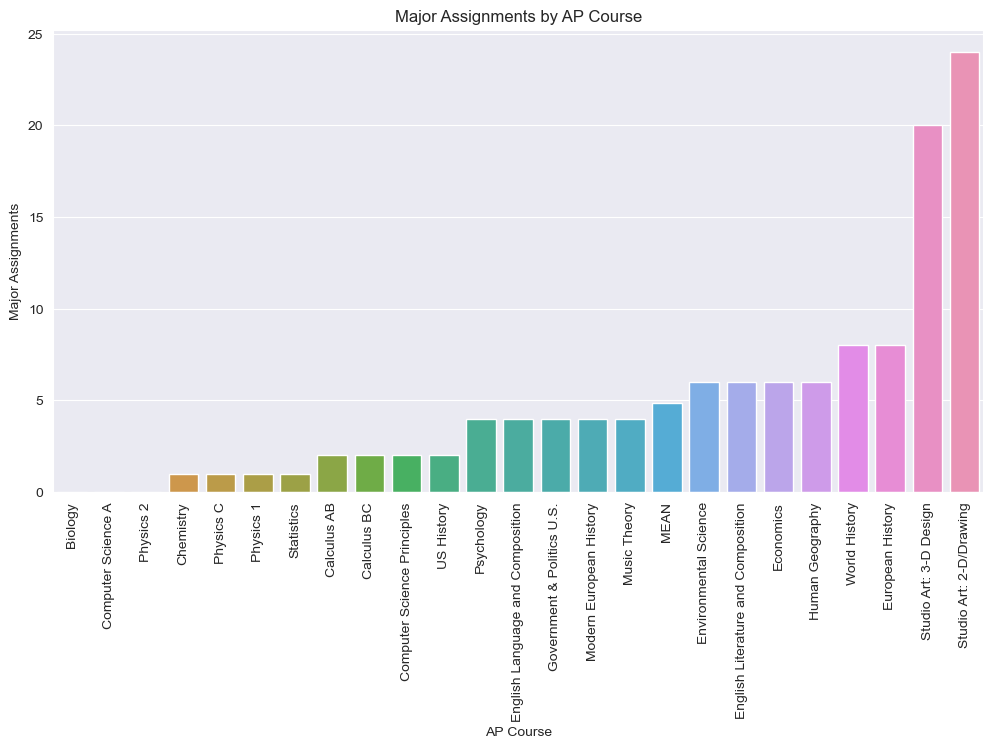

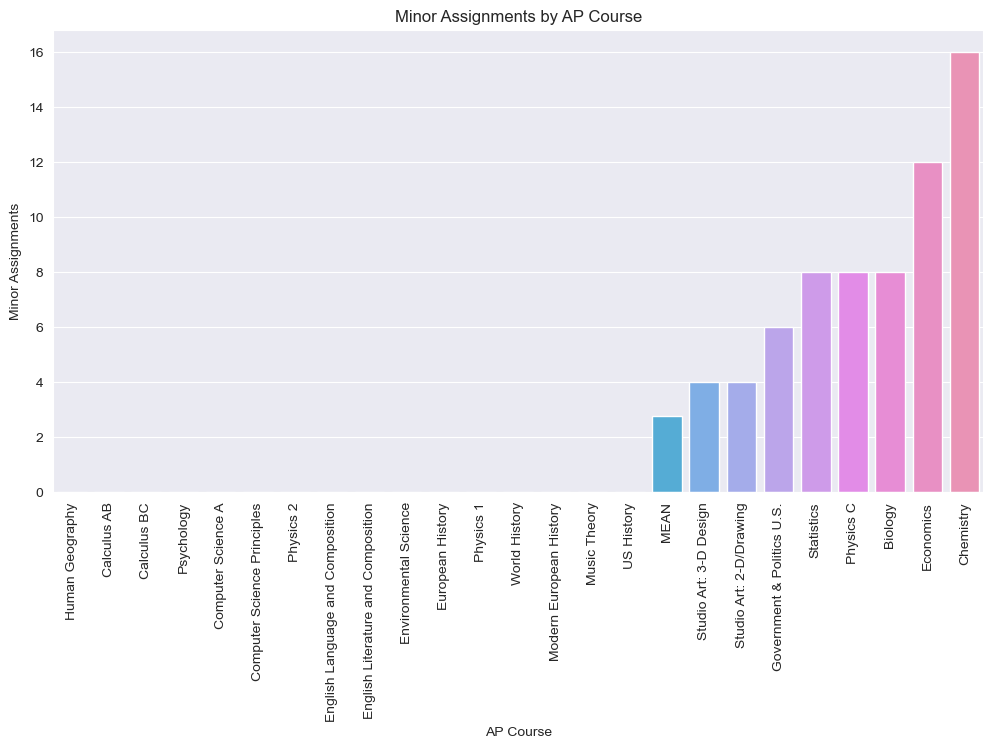

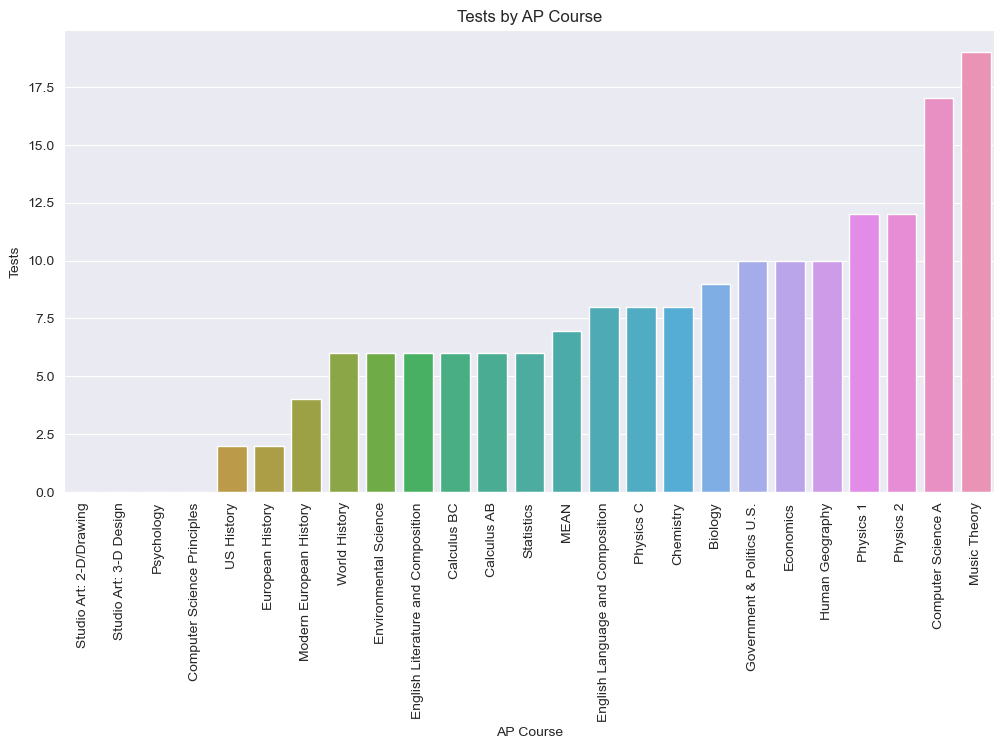

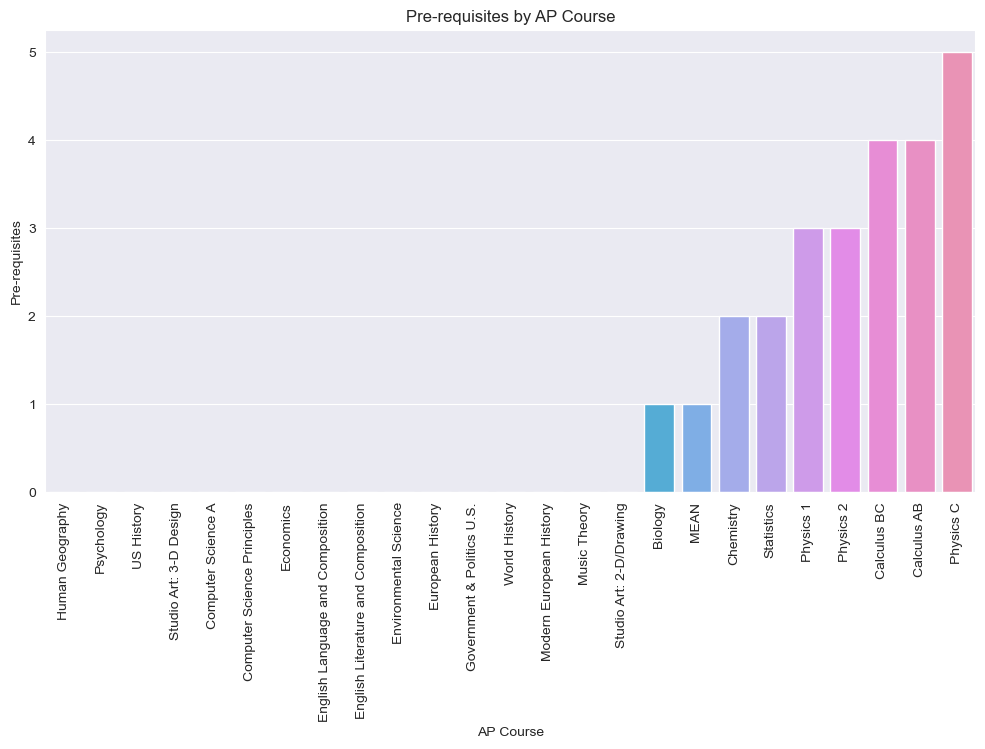

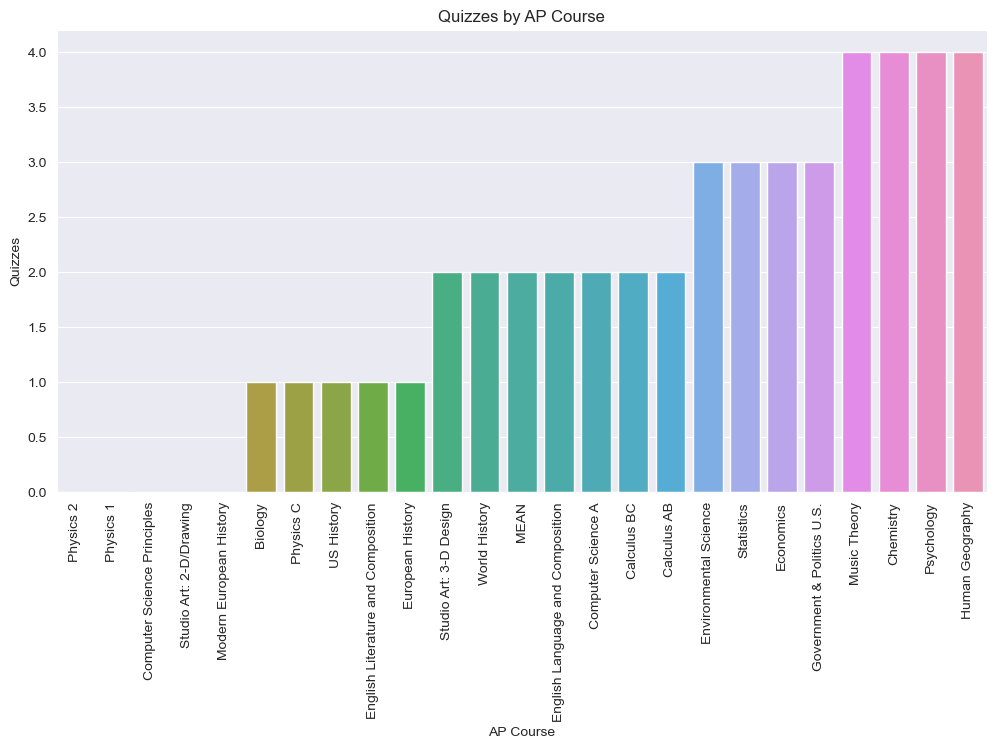

In [49]:
# Bar plot for Major Assignments by AP Course
plt.figure(figsize=(12, 6))
sns.barplot(x='AP Course', y='Major Assignments', data=df.sort_values('Major Assignments'))
plt.title('Major Assignments by AP Course')
plt.xticks(rotation=90)
plt.show()

# Bar plot for Minor Assignments by AP Course
plt.figure(figsize=(12, 6))
sns.barplot(x='AP Course', y='Minor Assignments', data=df.sort_values('Minor Assignments'))
plt.title('Minor Assignments by AP Course')
plt.xticks(rotation=90)
plt.show()

# Bar plot for Tests by AP Course
plt.figure(figsize=(12, 6))
sns.barplot(x='AP Course', y='Tests', data=df.sort_values('Tests'))
plt.title('Tests by AP Course')
plt.xticks(rotation=90)
plt.show()

# Bar plot for Pre-requisites by AP Course
plt.figure(figsize=(12, 6))
sns.barplot(x='AP Course', y='Pre-requisites', data=df.sort_values('Pre-requisites'))
plt.title('Pre-requisites by AP Course')
plt.xticks(rotation=90)
plt.show()

# Bar plot for quizzes by AP Course 
# convert categorical data to numeric data (0 for no quizzes, 1 for low, 2 for medium, 3 for high, 4 for daily)
df['Quizzes'] = df['Quizzes'].replace(['None', 'Low', 'Medium', 'High', 'Daily'], [0, 1, 2, 3, 4])

plt.figure(figsize=(12, 6))
sns.barplot(x='AP Course', y='Quizzes', data=df.sort_values('Quizzes'))
plt.title('Quizzes by AP Course')
plt.xticks(rotation=90)
plt.show()

#### Major Assignments by AP Course:

- Courses such as `Biology`, `Computer Science A`, and `Physics 2` have a notably lower number of major assignments, all hovering around or below 5.
  
- In contrast, courses like `English Language and Composition`, `English Literature and Composition`, and `Human Geography` have a substantial volume of major assignments, with counts ranging from approximately 15 to 24.

- The course with the highest number of major assignments is `Studio Art - 2D Drawing`, exceeding 20 assignments for the course duration.

- There's a considerable variability in assignment counts across courses. For instance, `Calculus AB`, `US History`, and `Environmental Science` present an intermediate volume of major assignments, between 8 to 12.

- Such disparity might reflect the nature of the subjects. Courses that are literature or arts-oriented, such as the English courses and Studio Art, potentially require more comprehensive projects or essays. Conversely, science and math courses might emphasize periodic assessments or lab reports over numerous major assignments.

#### Minor Assignments by AP Course:

- `Human Geography`, `Calculus AB`, `Calculus BC`, `Psychology`, and `Computer Science A` have the fewest minor assignments, all registering at or near zero. This suggests these courses might be more focused on larger assessments or projects rather than frequent minor tasks.

- `Chemistry` stands out with the highest number of minor assignments, approaching 16. This could indicate a course structure that emphasizes regular, smaller assignments or quizzes to assess students' understanding of the material.

- A cluster of courses including `English Language and Composition`, `Environmental Science`, `Modern European History`, `World History`, and `Music Theory` have a moderate number of minor assignments, ranging between 5 to 9. This might reflect a balanced approach between major and minor assessments in these courses.

- It's interesting to observe that while `Studio Art - 2D Drawing` had the highest number of major assignments in the previous chart, its minor assignments are relatively fewer, hovering around 8. This reinforces the idea that the course might prioritize comprehensive projects.

- `Physics C`, `Biology`, `Economics`, `Government & Politics U.S.`, and `Statistics` also show a moderate to high count of minor assignments, with numbers spanning from 9 to 14. This suggests regular assessments or tasks alongside their primary curriculum components.

#### Tests by AP Course:

- `Studio Art - 2D Drawing`, `Studio Art - 3D Design`, and `Psychology` exhibit the least number of tests, each barely surpassing 1 or 2 tests during the course. This might suggest a more project or portfolio-based assessment system for these classes, especially for the studio art subjects.

- In stark contrast, `Music Theory` registers the highest count of tests, reaching close to 18. Such a high frequency implies a curriculum that strongly emphasizes periodic assessments, possibly due to the intricate and multifaceted nature of the subject matter.

- `Computer Science A` and `Physics A` also showcase a significant number of tests, falling between 13 to 15. This possibly reflects the systematic and cumulative nature of these subjects, where foundational knowledge needs constant testing to ensure deep understanding.

- There's a consistent batch of courses — `Chemistry`, `Biology`, `Government & Politics U.S.`, `Economics`, `Human Geography`, `Physics C`, and `English Language and Composition` — that seem to adhere to a moderate testing frequency, hovering between 8 to 12 tests. This suggests a balanced curriculum that mixes tests with other forms of assessment.

- `Calculus AB` and `Calculus BC`, despite being advanced subjects, maintain a relatively average testing count, around 7-8. This might be due to a combination of tests, quizzes, and projects being employed to gauge students' proficiency in these courses.

#### Pre-requisites by AP Course:

- Beginning with courses that have virtually no pre-requisites, we have `Human Geography`, `Psychology`, `US History`, `Studio Art - 3D Design`, and `Computer Science A`. This suggests that these subjects offer an introductory experience in their respective domains, making them accessible to students without prior knowledge.

- A slight step up in complexity, courses like `English Language and Composition`, `Economics`, `Environmental Science`, `Government & Politics U.S.`, `Modern European History`, `World History`, `Music Theory`, `Biology`, and `Studio Art - 2D Drawing` have a single pre-requisite. This indicates that while they might welcome beginners, some foundational knowledge from a previous course could be beneficial.

- Courses like `Chemistry` and `Statistics` require two pre-requisites, hinting at a more intricate curriculum that builds upon previous subjects. A student diving into these might need to have a good grasp of earlier concepts to succeed.

- Moving further up the ladder of complexity, `Physics 2`, `Calculus AB`, and `Physics C` demand three pre-requisites. These are advanced courses that rely heavily on foundational principles from preceding subjects.

- At the pinnacle stands `Calculus BC` with a striking need for four pre-requisites, emphasizing its advanced nature and the depth of understanding required to undertake it. It's evident that this course targets students with a strong foundation in mathematics and related subjects.

### Quizzes by AP Course:

- Starting with courses that have no scheduled quizzes, we have `Human Geography`, `Psychology`, `Chemistry`, `Music Theory`, `Statistics`, and `Economics`. It's intriguing to note that despite their diverse subjects, these courses employ a similar assessment strategy of excluding quizzes.

- Progressing to courses with a low frequency of quizzes, `Government & Politics U.S.`, `Environmental Science`, and `US History` fall under this category. These subjects likely utilize other methods of evaluation or encourage project-based assessments.

- Occupying the middle ground with a medium frequency of quizzes, we find `World History`, `English Language and Composition`, `Studio Art - 3D Design`, `Computer Science A`, `Calculus BC`, and `Calculus AB`. The consistency in quizzes for these courses suggests a balanced approach to assessments, combining both regular checks on understanding and more comprehensive exams.

- Leaning towards a higher frequency, `English Literature and Composition`, `Modern European History`, `Computer Science Principles`, `Studio Art - 2D Drawing`, and `Physics 1` implement frequent quizzes to maintain a steady gauge on students' grasp of the material.

- Standing apart with daily quizzes are `Physics 2`. This indicates an intensive approach to ensure that students keep pace with the challenging content, reinforcing concepts daily.

### 4.7 Line Plots

In [50]:
import plotly.express as px

# Selecting relevant columns
success_rate_cols = ['AP Course', 'G:<11 S:3+', 'G:11 S:3+', 'G:12 S:3+', 'G:ALL S:3+']
df_success_rate = df[success_rate_cols].iloc[:-1]  # Excluding the "MEAN" row

# Reshaping the entire dataset (including the "MEAN" row) for plotting with Plotly
df_melted = df.melt(id_vars='AP Course',
                    value_vars=['G:<11 S:3+', 'G:11 S:3+', 'G:12 S:3+', 'G:ALL S:3+'],
                    var_name='Grade Level',
                    value_name='Success Rate')

# Creating an interactive line chart
fig = px.line(df_melted, x='Grade Level', y='Success Rate', color='AP Course',
              labels={'Success Rate': 'Success Rate (%)', 'Grade Level': 'Grade Level'},
              title='Success Rate by Grade for AP Courses (Including Mean)')

# Show the figure
fig.show()


#### Success Rate by Grade for Each AP Course:

- The dataset displays the success rate, as a percentage, for various AP courses across different grade levels denoted as 'G:<11 S:3+', 'G:11 S:3+', 'G:12 S:3+', and 'G:ALL S:3+'.
- Overall, the success rate exhibits a substantial amount of variability across AP courses and grade levels. No single trend prevails for all courses, indicating the distinctive challenges and demands of each subject.

- The "MEAN" line, provides a general trend across all courses. This average line appears relatively stable across grade levels but does show a minor decline from 'G:<11 S:3+' to 'G:ALL S:3+'.

- Courses such as Biology, Chemistry, and English Literature and Composition show a decline in success rate as the grade level increases. This could be due to the complexity of content in the higher grades or perhaps the increased workload and pressure that older students might face.

- In contrast, courses like US History and Physics C show an increase in success rates as students progress through their grade levels. This could be an indication that students become better equipped or more experienced to tackle the challenges these subjects present as they progress in their academic journey.

- Some courses, like Government & Politics U.S. and Studio Art: 2-D/Drawing, display a more erratic trend, with success rates oscillating as the grade level changes. This might be reflective of the cohort of students taking the course in a particular year or other external factors influencing performance.

- Interestingly, several courses, such as Computer Science A and World History, maintain a relatively steady success rate irrespective of the grade level. This steadiness suggests a consistent level of challenge or perhaps a standardized teaching approach that yields uniform results across different grades.

In conclusion, the success rate in AP courses varies not just by the subject but also by the grade level. While some courses show a consistent trend, others oscillate, indicating that various factors, both internal (like course content and teaching methodology) and external (like student cohort and external pressures), play a role in determining success rates.

### 4.8 Radar/Spider Plot

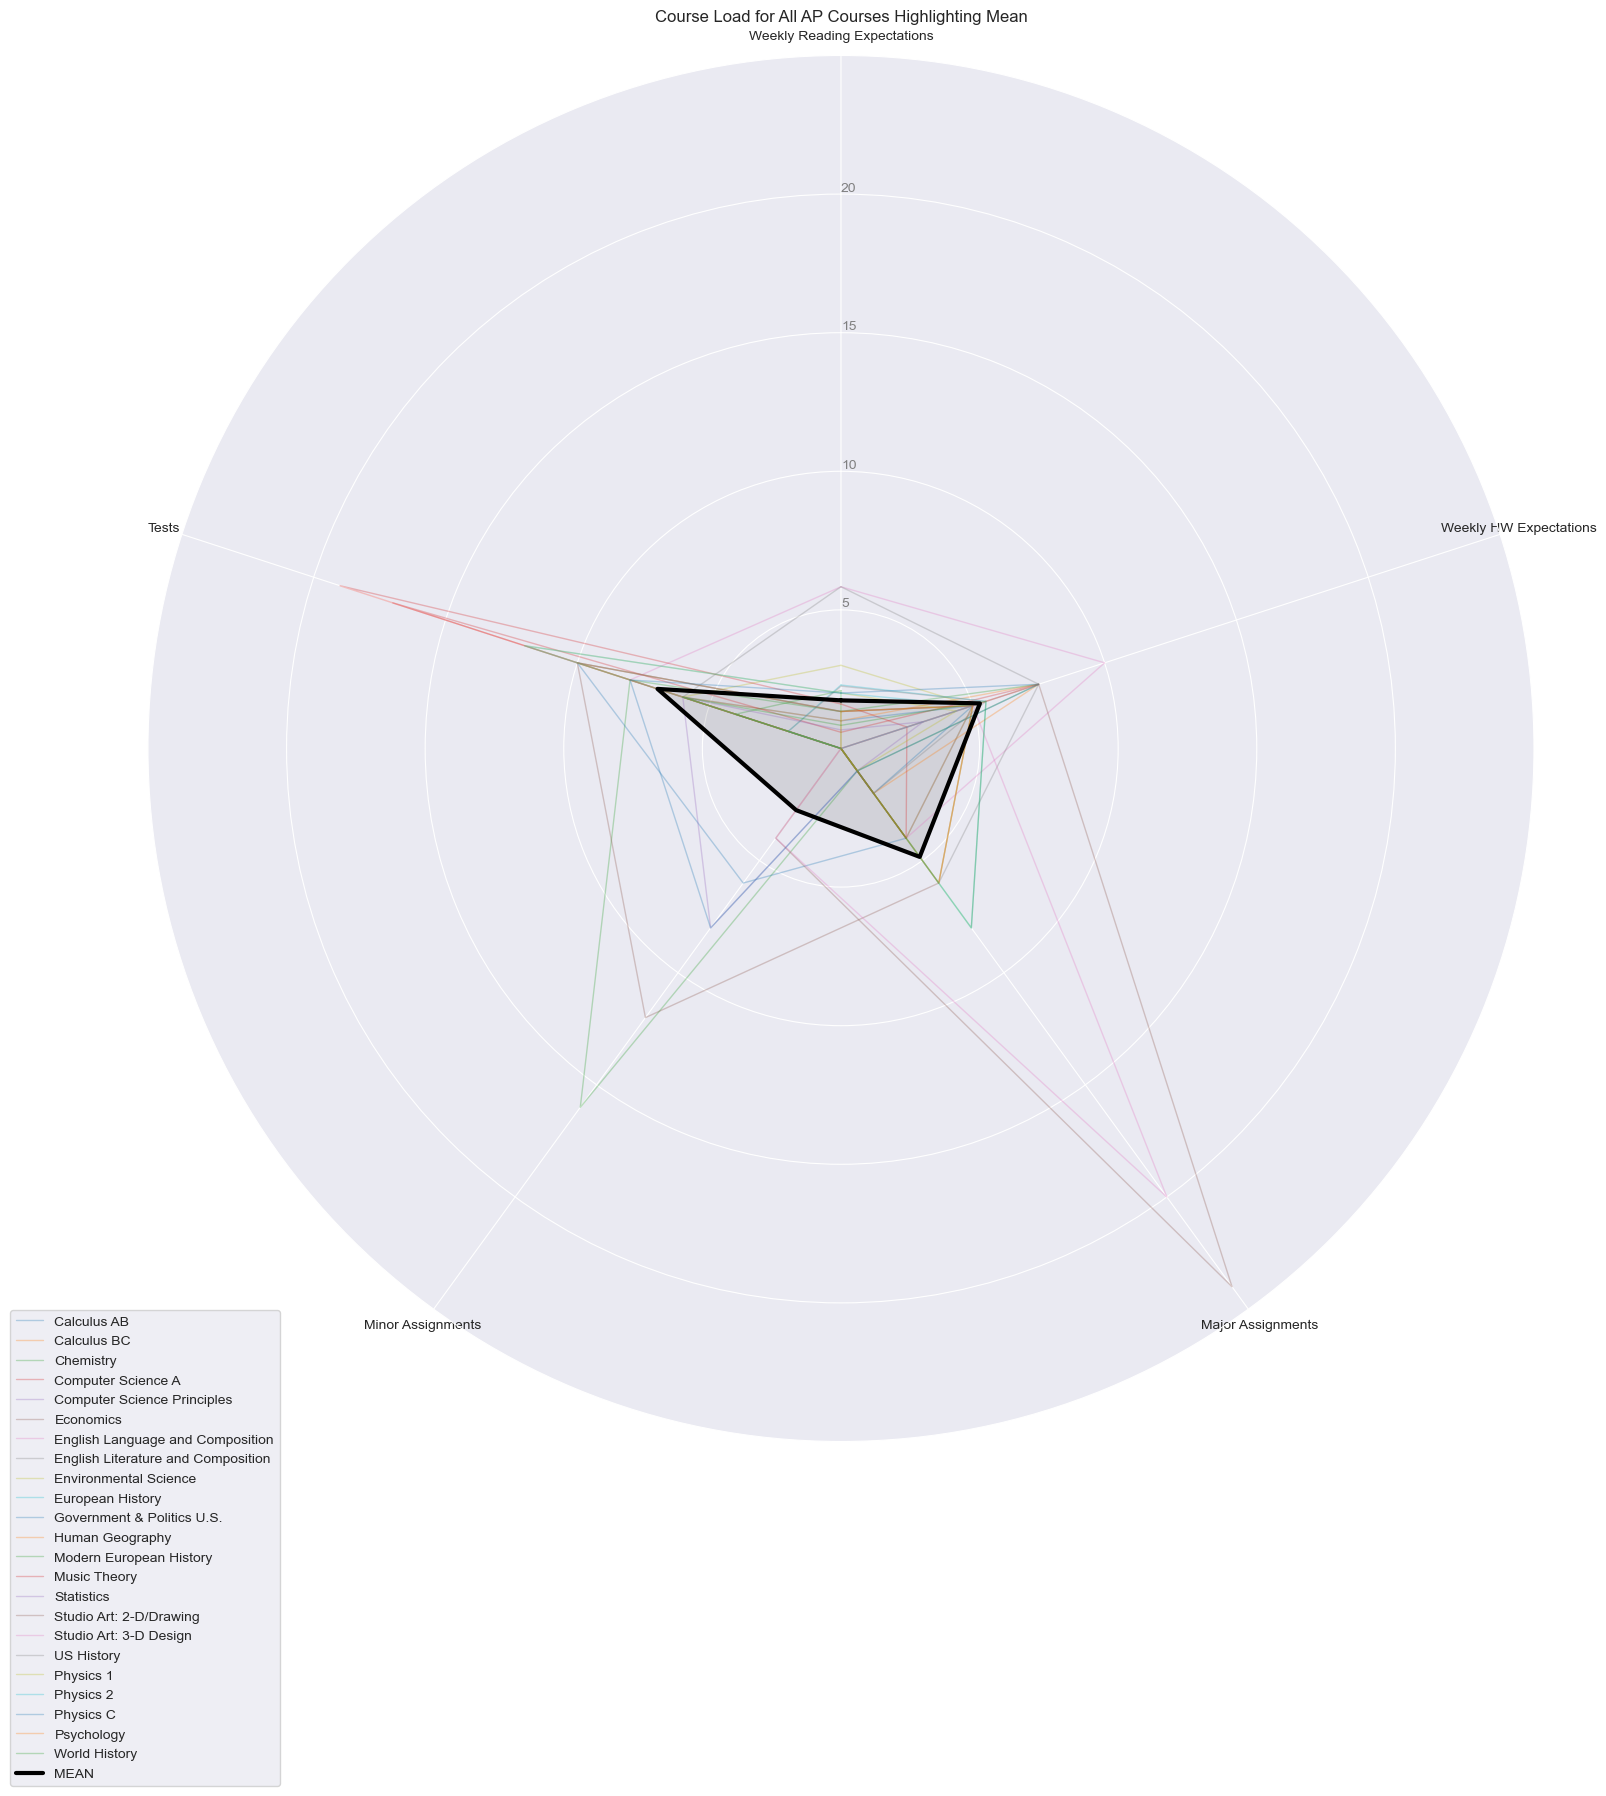

In [51]:
# Define the categories/columns for the Radar Chart
categories = ['Weekly Reading Expectations', 'Weekly HW Expectations', 'Major Assignments', 'Minor Assignments', 'Tests']

# Extracting every AP course for visualization
all_courses = df['AP Course'].iloc[1:26].tolist()

# Extract the required data for the Radar Chart
data = df[df['AP Course'].isin(all_courses)][categories].values

# Number of categories
N = len(categories)

# Setting the angle for each axis in the plot
angles = [n / float(N) * 2 * 3.14159 for n in range(N)]
angles += angles[:1]

# Initialize the Radar Chart
plt.figure(figsize=(18, 18))
ax = plt.subplot(111, polar=True)

# Draw one axis per variable + add labels
ax.set_theta_offset(3.14159 / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(0)
plt.yticks([5, 10, 15, 20], ["5", "10", "15", "20"], color="grey", size=10)
plt.ylim(0, 25)

# Plotting data for each AP course
for i in range(len(all_courses)):
    values = data[i].tolist()
    values += values[:1]
    if all_courses[i] == "MEAN":
        ax.plot(angles, values, linewidth=3, linestyle='solid', color='black', label=all_courses[i])
        ax.fill(angles, values, color='black', alpha=0.1)
    else:
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=all_courses[i], alpha=0.3)

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Course Load for All AP Courses Highlighting Mean')
plt.show()

### Weekly Reading Expectations:

- Observing the dataset, the majority of AP courses seem to anticipate students to invest around 0 to 5 hours in weekly readings. This range is slightly broader than previously observed, suggesting there's a bit of variance in reading expectations among these AP courses.
- The thicker, bold line, which indicates the mean, demonstrates that the average reading time for these AP courses hovers around 2 hours weekly.
- Courses that extend beyond 5 hours of weekly reading remain exceptions and are sparse. This could pertain to courses with vast literature components or intensive resource materials.

### Weekly HW Expectations:

- The dataset for weekly HW expectations exhibits a slight right skew, with the majority of AP courses forecasting around 0 to 7 hours of homework each week. This distribution suggests that while many courses might have moderate homework loads, a significant fraction expects students to commit considerable time.
- The mean line for HW expectations is just under 5 hours, which, when compared to reading expectations, signals that coursework weighs more on hands-on assignments rather than passive reading tasks.
- Outliers are present for courses anticipating over 10 hours of homework weekly. These might be subjects that are practically intensive, requiring students to engage in prolonged projects or research assignments.

### Other Observations:

- For both reading and homework expectations, the variance seems tighter for subjects like Mathematics and Computer Science and broader for subjects like History and Environmental Science. This might indicate that while some subjects have a defined structure and expectation, others offer instructors more flexibility in curriculum design.

### 4.9 Surprises
While navigating the dataset, certain assumptions were naturally drawn about how various features might relate to AP scores. However, as the data was dissected, some of these initial beliefs were overturned, yielding several intriguing discoveries:

1. Reading Expectations vs. AP Scores: A logical presumption would be that more rigorous reading expectations would correlate with better AP exam readiness and thus, higher scores. However, the data revealed a moderate negative correlation between reading expectations and AP scores. This unexpected trend suggests that courses demanding more reading don't necessarily result in better AP scores. An additional layer of consideration is that humanities classes, which typically require more reading, might inherently produce lower scores.

2. Major Assignments' Role in Achieving Higher Scores: It was initially believed that the frequency of major assignments would be a determinant of a student's foundational understanding, influencing scores of 3 and above. However, the actual data showed a different story. While there was a minimal correlation between major assignments and scores of 3+, a distinct correlation was observed with scores of 4+ and 5 for all grades. This indicates that these assignments, rather than ensuring a passing grade, potentially drive students towards a more profound understanding, helping them achieve top scores.

3. The Nuance of Attendance Criticality: Based on the data, certain courses were identified where missing even a few sessions could be detrimental to a student's progress. This wasn't about mandatory attendance but rather about courses where the nature of content delivery made catching up after absences challenging. Factors like sequential learning or infrequent class meetings played a role in this. The surprising find was the moderate positive correlation between such courses (where catching up is challenging) and higher AP scores. This suggests that courses that employ sequential learning or meet less frequently tend to have students scoring higher on AP exams. It's intriguing because one might assume that classes where it's hard to catch up after missing a session would have a negative impact on scores, but the data suggests the opposite.

4. Surprising Variations in AP Scores Across Different Grade Levels: The t-tests were performed to understand if there were significant differences in AP scores across various grade levels and score brackets. While we'd expect differences between scores like 3+ vs. 4+ within the same grade level, the surprising element comes from comparing similar score brackets across different grade levels. One of the striking revelations is the consistent disparities between scores of students in grade levels below Grade 11 and those in Grades 11 or 12, even for the same score brackets. This was unexpected because one might assume that the ability to achieve a score of 4+ would be relatively consistent across grade levels for the same AP class. The observed differences suggest that younger students (below Grade 11) in the same AP class might face more challenges achieving higher scores compared to their older peers. Another surprise was the widening gap when looking at perfect scores (5). The difference between students below Grade 11 (G:<11 S:5) and those in Grade 12 (G:12 S:5) was even more pronounced than those achieving scores of 4+. This might indicate that achieving a perfect score in an AP class becomes increasingly attainable as students progress through high school, possibly due to better preparation, maturity, or teaching methodologies tailored to older students.

## 5. Feature Engineering

In [52]:
# Drop rows with AP scores of 3 and 5
df = df.drop('G:<11 S:3+', axis=1)
df = df.drop('G:11 S:3+', axis=1)
df = df.drop('G:12 S:3+', axis=1)
df = df.drop('G:<11 S:5', axis=1)
df = df.drop('G:11 S:5', axis=1)
df = df.drop('G:12 S:5', axis=1)
df = df.drop('G:ALL S:3+', axis=1)
df = df.drop('G:ALL S:4+', axis=1)
df = df.drop('G:ALL S:5', axis=1)

# Convert minor assignments to weekly time
df['Minor Assignments'] = df['Minor Assignments'] * 0.5 / 36

# Convert major assignments to weekly time
df['Major Assignments'] = df['Major Assignments'] * 2 / 36

# Convert tests to weekly time
df['Tests'] = df['Tests'] * 2.5 / 36

# Create workload column
df['Workload'] = df['Weekly Reading Expectations'] + df['Weekly HW Expectations'] + df['Minor Assignments'] + df['Major Assignments'] + df['Tests']

# Drop the columns that were used to create the workload column
df = df.drop('Weekly Reading Expectations', axis=1)
df = df.drop('Weekly HW Expectations', axis=1)
df = df.drop('Minor Assignments', axis=1)
df = df.drop('Major Assignments', axis=1)
df = df.drop('Tests', axis=1)

# Drop the quizzes column
df = df.drop('Quizzes', axis=1)

# Drop the attendance criticality column
df = df.drop('Attendance Criticality', axis=1)

# Analyze the new dataframe
df.describe()

,Pre-requisites,G:<11 S:4+,G:11 S:4+,G:12 S:4+,Workload
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,1.000000,0.404214,0.389980,0.351092,7.796806
std,1.581139,0.171801,0.146543,0.110484,3.177162
min,0.000000,0.125692,0.206719,0.194030,0.111111
25%,0.000000,0.289776,0.282838,0.284454,6.557222
50%,0.000000,0.352689,0.366783,0.327673,7.736111
75%,2.000000,0.499402,0.444749,0.401460,8.888889
max,5.000000,0.796337,0.744485,0.621889,16.612778


## 6. Modeling

#### 6.1 K-Means Clustering
While the dataset contains a wealth of information, it's challenging to draw meaningful insights from it due to its size and complexity. To address this, I will employ clustering algorithms to group AP courses based on their pre-requisite count, workload and success metrics. This will help identify patterns and trends that might not be apparent when analyzing the entire dataset. I still start with k-means clustering as it is simple and efficient. However, as the dataset is relatively small, and the data is not linearly separable, I suspect that k-means will not be the best clustering algorithm and more complex algorithms must be explored.

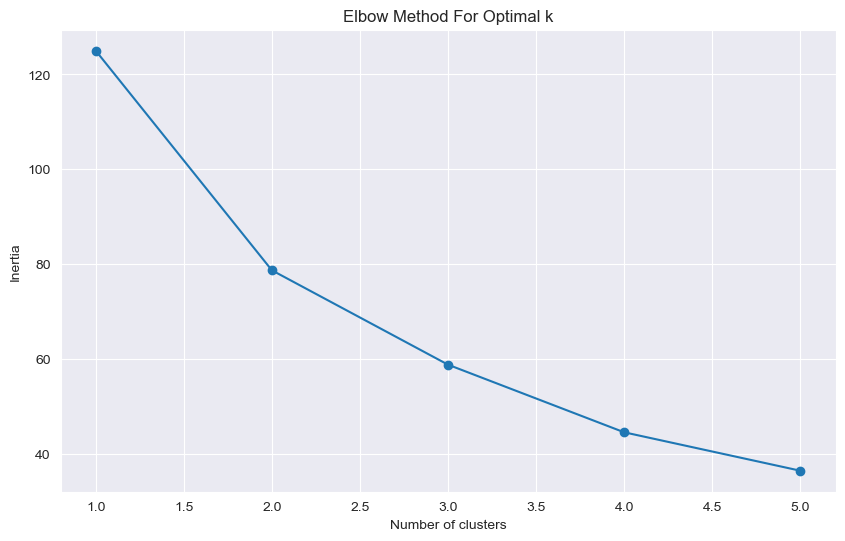

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting relevant features for clustering
features = ['Pre-requisites', 'G:<11 S:4+', 'G:11 S:4+', 'G:12 S:4+', 'Workload']
X = df[features]

# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
# Given the small dataset and the project's specific goals, a reasonable number of clusters would be around 3 to 5
# This is based on the idea of identifying groups for different grades (9th/10th, 11th, 12th)

inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

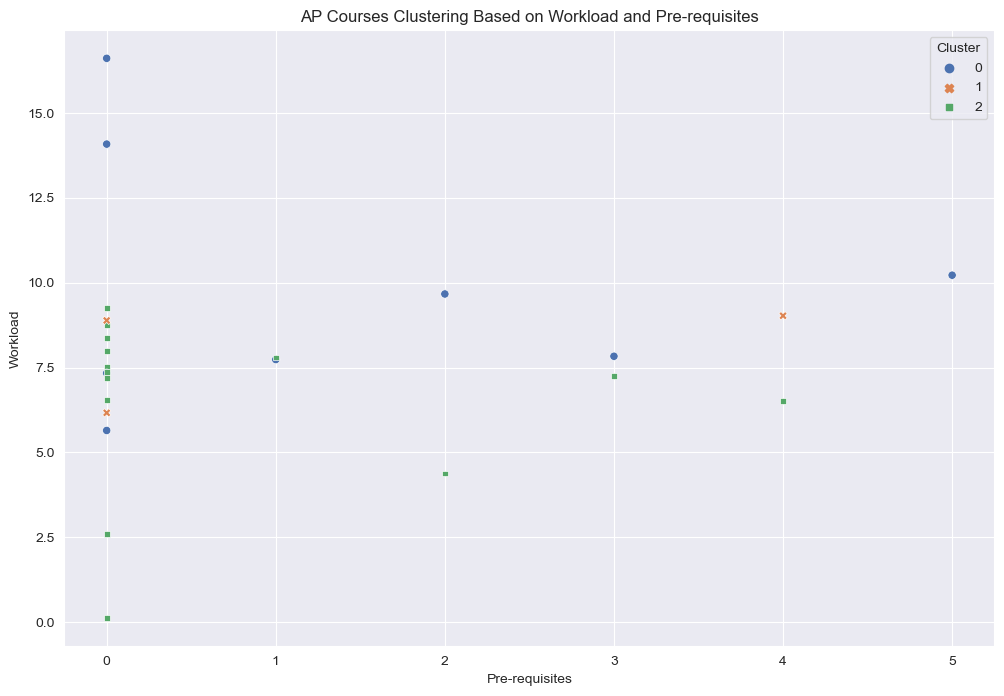

In [54]:
# Fitting the K-Means model with 3 clusters
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
df['K-Means Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizing the clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Pre-requisites', y='Workload', hue='K-Means Cluster', palette='deep', style='K-Means Cluster')
plt.title('AP Courses Clustering Based on Workload and Pre-requisites')
plt.xlabel('Pre-requisites')
plt.ylabel('Workload')
plt.legend(title='Cluster', loc='upper right')
plt.show()

In [55]:
# Grouping the dataframe by cluster and calculating mean values for each cluster
cluster_means = df.groupby('K-Means Cluster').mean(numeric_only=True)

# Displaying the mean values for each cluster
cluster_means

,Pre-requisites,G:<11 S:4+,G:11 S:4+,G:12 S:4+,Workload
K-Means Cluster,,,,,
0,1.375000,0.262198,0.256272,0.252071,9.892431
1,1.333333,0.736710,0.710020,0.577776,8.027778
2,0.714286,0.414117,0.397804,0.359100,6.549812


In [56]:
print(df['K-Means Cluster'].value_counts())

2    14
0     8
1     3
Name: K-Means Cluster, dtype: int64


While the clusters do provide some insightful information, as it grouped separated the high pre-requisite courses from the low pre-requisite courses and the low success rate courses from the high success rate courses, it did not manage to separate the courses much by workload with all clusters having a similar workload. Further, the clusters are not very balanced, with cluster 0 having 13 courses, more than double the number of courses in clusters 1 and 2. This is likely due to the small size of the dataset and the fact that the data is not linearly separable. Thus I will explore other clustering algorithms.

### 6.2 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a density-based clustering algorithm that groups together points that are closely packed together (points with many nearby neighbors), marking points in low-density regions as outliers. DBSCAN is a good choice for this dataset as it is not linearly separable and thus k-means is not a good choice. Further, DBSCAN is able to handle outliers well, which is important as there are several outliers in the dataset.

Estimated number of clusters: 5
Estimated number of noise points: 2


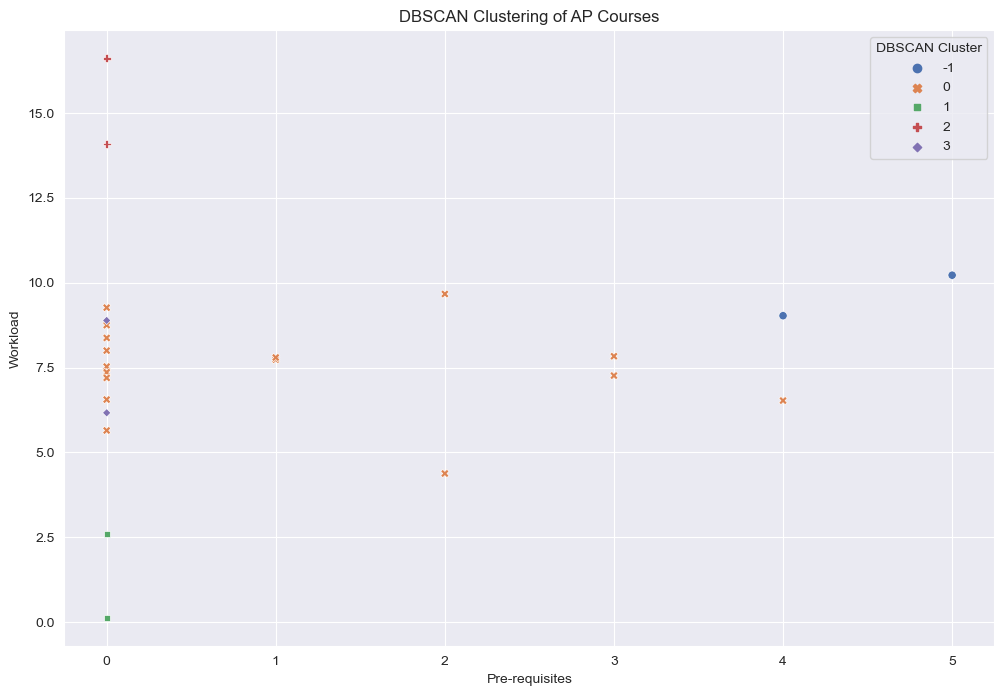

In [57]:
from sklearn.cluster import DBSCAN

# Applying DBSCAN Clustering
# The parameters eps and min_samples need to be chosen appropriately
# eps is the maximum distance between two samples for one to be considered in the neighborhood of the other
# min_samples is the number of samples in a neighborhood for a point to be considered as a core point

# Trying DBSCAN with some initial parameters
dbscan = DBSCAN(eps=1.5, min_samples=2)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Checking the number of clusters and points labeled as noise
n_clusters = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'] else 0)
n_noise = list(df['DBSCAN_Cluster']).count(-1)

print(f"Estimated number of clusters: {n_clusters}")
print(f"Estimated number of noise points: {n_noise}")

# Visualizing the DBSCAN clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Pre-requisites', y='Workload', hue='DBSCAN_Cluster', palette='deep', style='DBSCAN_Cluster')
plt.title('DBSCAN Clustering of AP Courses')
plt.xlabel('Pre-requisites')
plt.ylabel('Workload')
plt.legend(title='DBSCAN Cluster', loc='upper right')
plt.show()

In [58]:
# Checking the number of courses in each cluster
cluster_counts = df['DBSCAN_Cluster'].value_counts()
cluster_counts

 0    17
-1     2
 1     2
 2     2
 3     2
Name: DBSCAN_Cluster, dtype: int64

In [59]:
# Grouping the dataframe by cluster and calculating mean values for each cluster
cluster_means = df.groupby('DBSCAN_Cluster').mean(numeric_only=True)
cluster_means

,Pre-requisites,G:<11 S:4+,G:11 S:4+,G:12 S:4+,Workload,K-Means Cluster
DBSCAN_Cluster,,,,,,
-1,4.500000,0.558525,0.499365,0.441718,9.625000,0.500000
0,0.941176,0.376739,0.360055,0.323473,7.483570,1.411765
1,0.000000,0.401854,0.363088,0.343968,1.348056,2.000000
2,0.000000,0.183117,0.244746,0.264657,15.348889,0.000000
3,0.000000,0.706896,0.707084,0.588782,7.527778,1.000000


The DBSCAN algorithm, while managing to create some meaningful clusters such as cluster 2 which has a high workload and low success rate and cluster 3 which had no pre-requisites and a low workload, it was overall severly unbalanced. Group 0 had 17 courses, which is even more unbalanced than the k-means algorithm. Further, is classified very high workload courses as noise, which is not ideal. Even when experimenting with multiple values for eps and min_samples, the results were not much better.

### 6.3 Hierarchical Clustering

Hierarchical clustering does not require pre-specifying the number of clusters and can provide a more nuanced understanding of the data structure. This method builds a hierarchy of clusters and is particularly useful for small datasets. Further, it is able to handle non-linear data well, which is important as the data is not linearly separable.

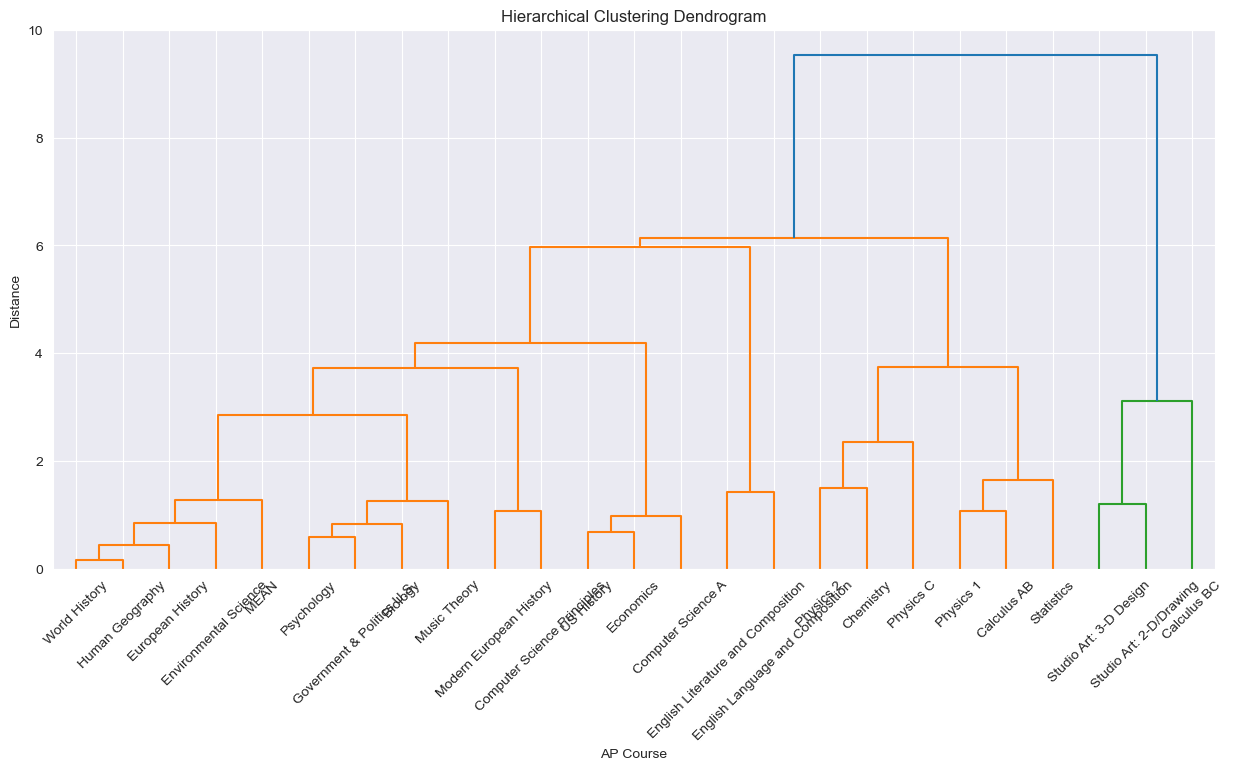

In [60]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Applying Hierarchical Clustering
linked = linkage(X_scaled, 'ward')

# Plotting the Dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(15, 7))
dendrogram(linked,
           orientation='top',
           labels=df['AP Course'].values,
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('AP Course')
plt.ylabel('Distance')
plt.show()

The dendrogram shows that there are a few large branches that merge at higher distances, suggesting distinct groupings of courses. Some courses are quite similar to each other, as indicated by the short distance at which they merge.


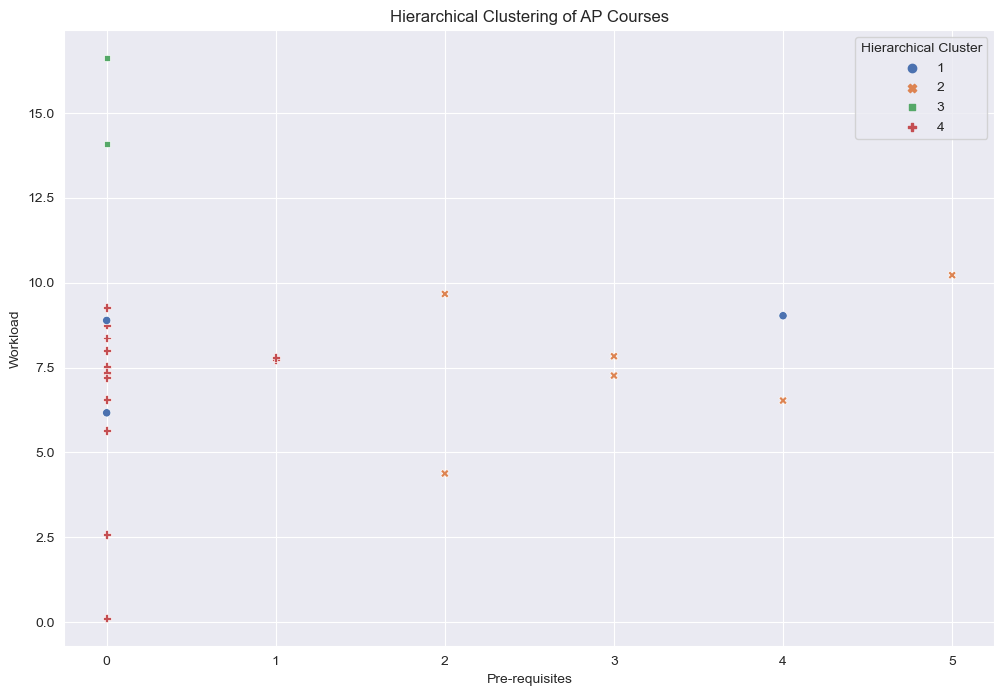

In [61]:
from scipy.cluster.hierarchy import fcluster

# Determining the clusters by cutting the dendrogram at a certain height
# Choosing a height that results in a meaningful number of clusters for our analysis
# Here, I'll experiment with a height that creates around 3 to 4 clusters

height = 5
clusters = fcluster(linked, height, criterion='distance')
df['Hierarchical_Cluster'] = clusters



# Visualizing the hierarchical clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Pre-requisites', y='Workload', hue='Hierarchical_Cluster', palette='deep', style='Hierarchical_Cluster')
plt.title('Hierarchical Clustering of AP Courses')
plt.xlabel('Pre-requisites')
plt.ylabel('Workload')
plt.legend(title='Hierarchical Cluster', loc='upper right')
plt.show()

In [62]:
# Checking the number of courses in each cluster
df['Hierarchical_Cluster'].value_counts()

4    14
2     6
1     3
3     2
Name: Hierarchical_Cluster, dtype: int64

In [63]:
# Grouping the dataframe by cluster and calculating mean values for each cluster
df.groupby('Hierarchical_Cluster').mean(numeric_only=True)

,Pre-requisites,G:<11 S:4+,G:11 S:4+,G:12 S:4+,Workload,K-Means Cluster,DBSCAN_Cluster
Hierarchical_Cluster,,,,,,,
1,1.333333,0.736710,0.710020,0.577776,8.027778,1.000000,1.666667
2,3.166667,0.395103,0.340845,0.272365,7.648981,1.000000,-0.166667
3,0.000000,0.183117,0.244746,0.264657,15.348889,0.000000,2.000000
4,0.142857,0.368455,0.363205,0.348604,6.731796,1.571429,0.142857


The hierarchical clustering algorithm did a much better job of clustering the courses than k-means. It managed to separate the courses by workload, pre-requisites, and success rate. Further, it managed to create a group of outlier courses that have a very high workload and very low success rate in cluster 3. However, the clusters are still not very balanced, with cluster 4 having 14 courses, more than double the number of courses in clusters 1 and 2. This is likely due to the small size and unbalanced nature of the dataset. While the clusters do provide valuable insights, it fails to provide ideal course selection for each grade level. While cluster 1 is good for 10th and 11th graders, no ideal clusters exist for 9th or 12th graders. I'll also experiment with higher cluster counts to see if that improves the results.

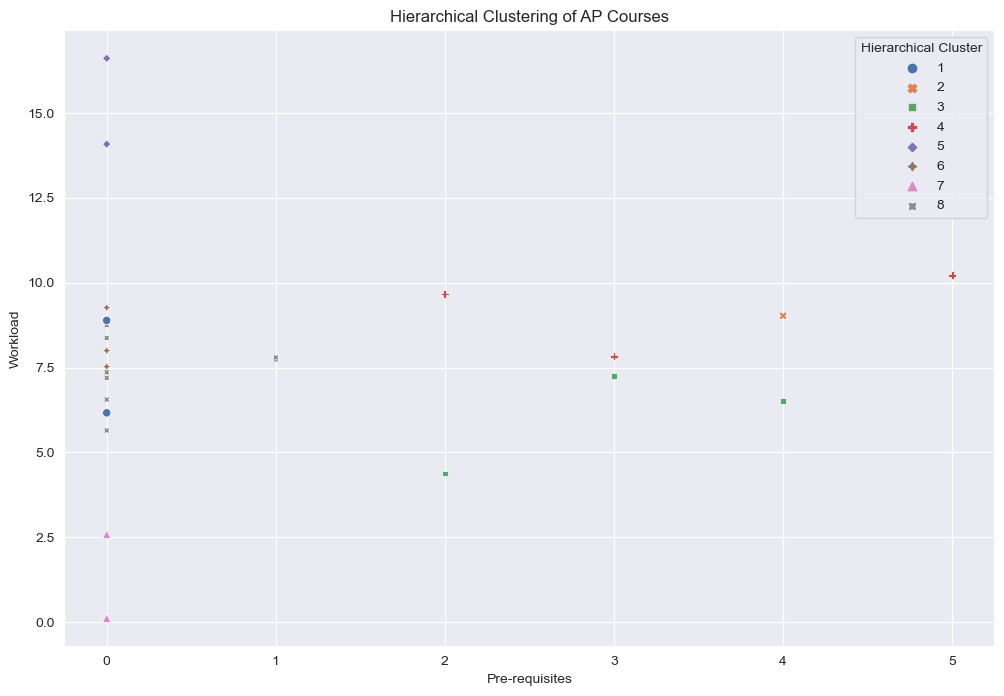

In [64]:
height = 3
clusters = fcluster(linked, height, criterion='distance')
df['Hierarchical_Cluster'] = clusters
# Visualizing the hierarchical clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Pre-requisites', y='Workload', hue='Hierarchical_Cluster', palette='deep', style='Hierarchical_Cluster')
plt.title('Hierarchical Clustering of AP Courses')
plt.xlabel('Pre-requisites')
plt.ylabel('Workload')
plt.legend(title='Hierarchical Cluster', loc='upper right')
plt.show()

In [65]:
# Checking the number of courses in each cluster
df['Hierarchical_Cluster'].value_counts()

8    9
3    3
4    3
6    3
7    2
5    2
1    2
2    1
Name: Hierarchical_Cluster, dtype: int64

In [66]:
# Grouping the dataframe by cluster and calculating mean values for each cluster
df.groupby('Hierarchical_Cluster').mean(numeric_only=True)

,Pre-requisites,G:<11 S:4+,G:11 S:4+,G:12 S:4+,Workload,K-Means Cluster,DBSCAN_Cluster
Hierarchical_Cluster,,,,,,,
1,0.000000,0.706896,0.707084,0.588782,7.527778,1.000000,3.000000
2,4.000000,0.796337,0.715893,0.555762,9.027778,1.000000,-1.000000
3,3.000000,0.514433,0.427202,0.290866,6.056667,2.000000,0.000000
4,3.333333,0.275773,0.254488,0.253864,9.241296,0.000000,-0.333333
5,0.000000,0.183117,0.244746,0.264657,15.348889,0.000000,2.000000
6,0.000000,0.522461,0.482989,0.425847,8.265000,2.000000,0.000000
7,0.000000,0.401854,0.363088,0.343968,1.348056,2.000000,1.000000
8,0.222222,0.309698,0.323303,0.323887,7.417114,1.333333,0.000000


Using high cluster counts creates interesting results. There are a larger number of meaningful groupings, but there are multiple very small clusters with only 1 or 2 courses. And group 8 has 9 courses, which are more than double the number of courses in any other group. However, overall the results are better than the lower cluster count. Course planning is clearer with a both high pre-requisite and high success rate courses for later grades and low pre-requisite and high success rate courses for earlier grades. But, classifying 9 courses as one group is not ideal. Thus I will experiment with other clustering algorithms.

### 6.4 Gaussian Mixture Models (GMM)

GMM is a probabilistic model that assumes the data is generated from a mixture of several Gaussian distributions with unknown parameters. It's more flexible than K-Means as it works well with clusters of different sizes and covariance structures. GMM could effectively identify clusters with varying pre-requisites, workloads, and success rates, providing a more nuanced segmentation of AP courses.

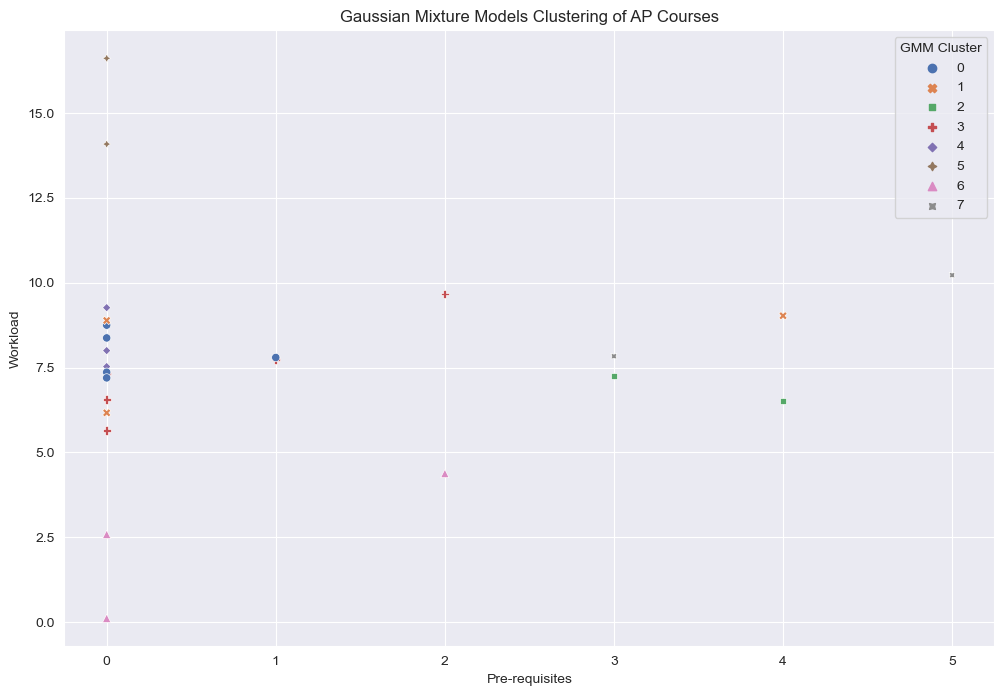

In [67]:
from sklearn.mixture import GaussianMixture

# Applying Gaussian Mixture Models
# The number of components needs to be chosen appropriately
# The number of components is the number of clusters
# I will experiment with 4 to 8 components

gmm = GaussianMixture(n_components=8, random_state=42)
df['GMM_Cluster'] = gmm.fit_predict(X_scaled)

# Visualizing the GMM clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Pre-requisites', y='Workload', hue='GMM_Cluster', palette='deep', style='GMM_Cluster')
plt.title('Gaussian Mixture Models Clustering of AP Courses')
plt.xlabel('Pre-requisites')
plt.ylabel('Workload')
plt.legend(title='GMM Cluster', loc='upper right')
plt.show()

In [68]:
# Checking the number of courses in each cluster
df['GMM_Cluster'].value_counts()

3    5
0    5
1    3
4    3
6    3
2    2
5    2
7    2
Name: GMM_Cluster, dtype: int64

In [69]:
# Grouping the dataframe by cluster and calculating mean values for each cluster
df.groupby('GMM_Cluster').mean(numeric_only=True)

,Pre-requisites,G:<11 S:4+,G:11 S:4+,G:12 S:4+,Workload,K-Means Cluster,DBSCAN_Cluster,Hierarchical_Cluster
GMM_Cluster,,,,,,,,
0,0.200000,0.315909,0.362201,0.379519,7.895806,2.0,0.000000,8.000000
1,1.333333,0.736710,0.710020,0.577776,8.027778,1.0,1.666667,1.333333
2,3.500000,0.544102,0.446330,0.295331,6.895833,2.0,0.000000,3.000000
3,0.600000,0.310941,0.274526,0.248456,7.388667,0.4,0.000000,7.200000
4,0.000000,0.522461,0.482989,0.425847,8.265000,2.0,0.000000,6.000000
5,0.000000,0.183117,0.244746,0.264657,15.348889,0.0,2.000000,5.000000
6,0.666667,0.419601,0.371708,0.323291,2.358148,2.0,0.666667,5.666667
7,4.000000,0.240171,0.244779,0.268350,9.027778,0.0,-0.500000,4.000000


The GMM algorithm did a good job of clustering the courses. It managed to separate the courses by workload, pre-requisites, and success rate. Further, it managed to create a group of outlier courses that have a very high workload and very low success rate in cluster 5. They are also much better balanced than the other algorithms, with the largest cluster having 5 courses. The results also provide valuable insights into course selection. There are groups with high pre-requisites and high success rates for later grades and low pre-requisite and high success rate courses for earlier grades. Importantly, there are also more in between groupings, courses that don't have much work but a moderate success rate and courses that have a moderate workload and a moderate success rate. This is important as it provides more options for students who are not sure what they want to take. 

### 6.5 Spectral Clustering

Spectral Clustering uses the eigenvalues of a similarity matrix to reduce the dimensionality of the dataset before clustering. It's particularly effective for data that has a non-convex shape and can capture complex structures. Given the small and potentially complex nature of our dataset, Spectral Clustering might better discern subtle groupings among AP courses based on multiple features.

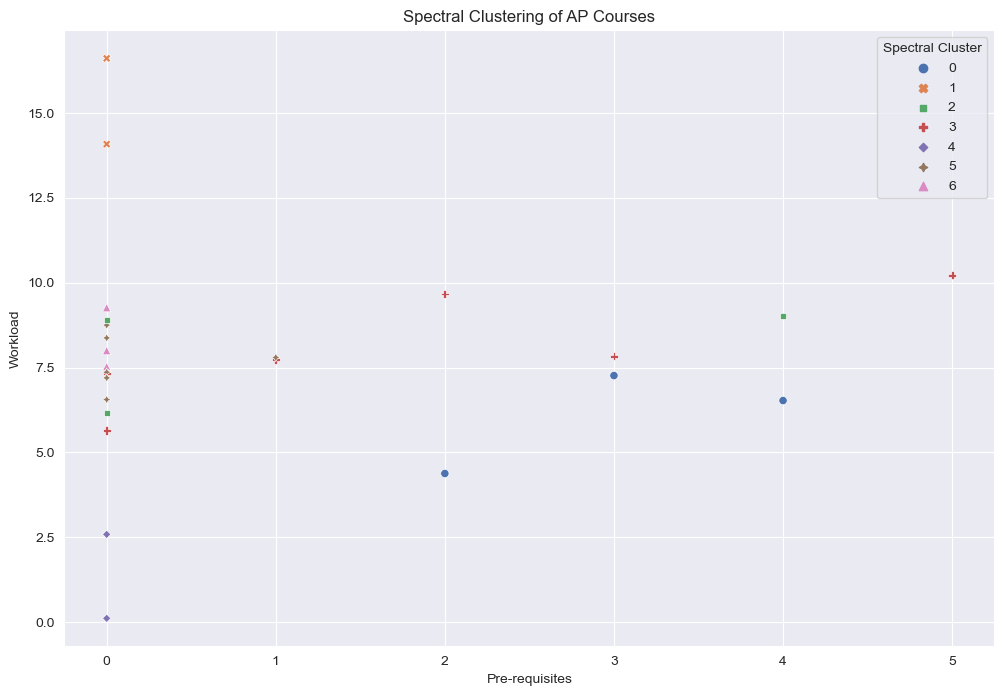

In [70]:
from sklearn.cluster import SpectralClustering

# Applying Spectral Clustering
# The number of clusters needs to be chosen appropriately
# I will experiment with 4 to 8 clusters

spectral = SpectralClustering(n_clusters=7, random_state=42)
df['Spectral_Cluster'] = spectral.fit_predict(X_scaled)

# Visualizing the Spectral clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Pre-requisites', y='Workload', hue='Spectral_Cluster', palette='deep', style='Spectral_Cluster')
plt.title('Spectral Clustering of AP Courses')
plt.xlabel('Pre-requisites')
plt.ylabel('Workload')
plt.legend(title='Spectral Cluster', loc='upper right')
plt.show()

In [71]:
# Checking the number of courses in each cluster
df['Spectral_Cluster'].value_counts()

3    6
5    6
0    3
2    3
6    3
4    2
1    2
Name: Spectral_Cluster, dtype: int64

In [72]:
# Grouping the dataframe by cluster and calculating mean values for each cluster
df.groupby('Spectral_Cluster').mean(numeric_only=True)

,Pre-requisites,G:<11 S:4+,G:11 S:4+,G:12 S:4+,Workload,K-Means Cluster,DBSCAN_Cluster,Hierarchical_Cluster,GMM_Cluster
Spectral_Cluster,,,,,,,,,
0,3.000000,0.514433,0.427202,0.290866,6.056667,2.0,0.000000,3.000000,3.333333
1,0.000000,0.183117,0.244746,0.264657,15.348889,0.0,2.000000,5.000000,5.000000
2,1.333333,0.736710,0.710020,0.577776,8.027778,1.0,1.666667,1.333333,1.000000
3,1.833333,0.288558,0.260114,0.247876,8.073611,0.0,-0.166667,6.000000,4.333333
4,0.000000,0.401854,0.363088,0.343968,1.348056,2.0,1.000000,7.000000,6.000000
5,0.166667,0.313875,0.352085,0.364887,7.672708,2.0,0.000000,8.000000,0.500000
6,0.000000,0.522461,0.482989,0.425847,8.265000,2.0,0.000000,6.000000,4.000000


The spectral clustering algorithm while performing better than k-means, DBSCAN, and hierarchical clustering, in terms of balance, it did not perform as well as GMM. It failed to pick out the courses with high pre-requisites and high success rates for later grades and low pre-requisite and high success rate courses for earlier grades. So while it did a good job of finding good groupings of courses, it did not do a good job of finding the ideal courses for each grade level. 

### 6.6 Cluster Evaluation

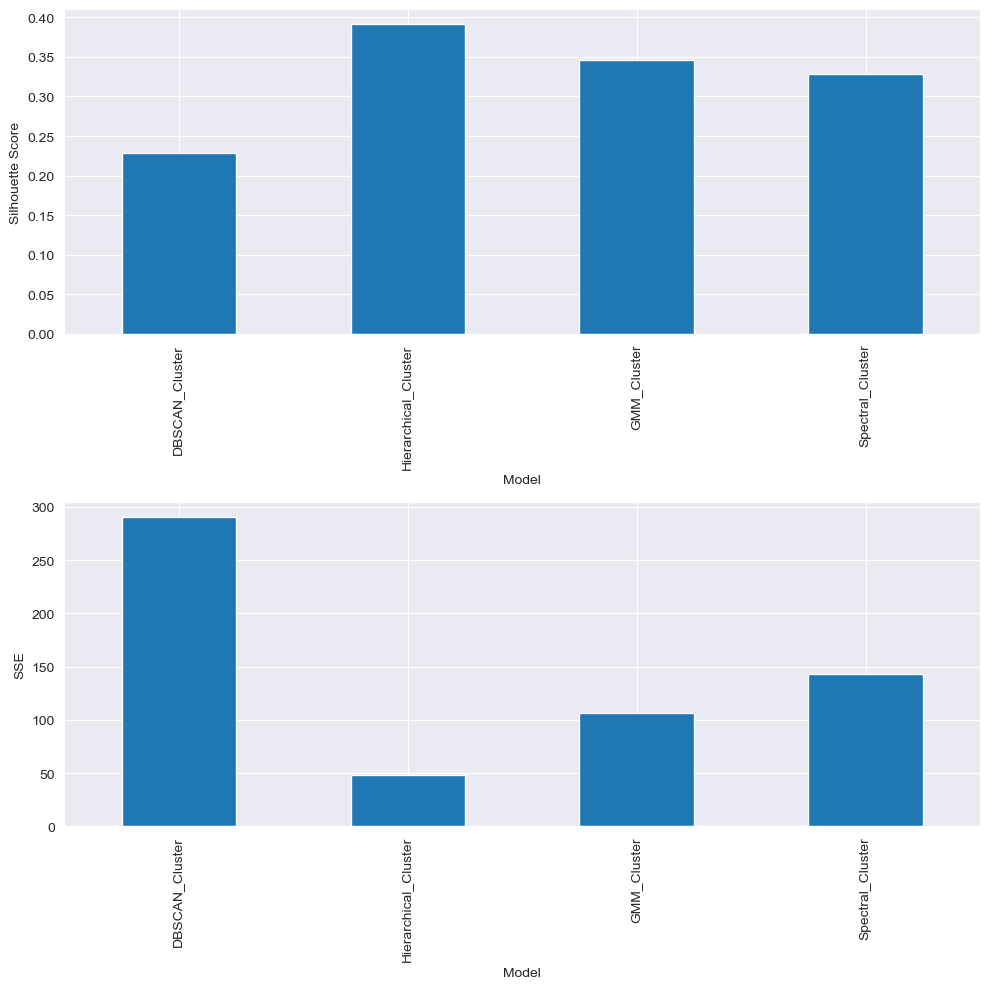

In [73]:
from sklearn.metrics import silhouette_score

# List of models
models = ['DBSCAN_Cluster', 'Hierarchical_Cluster', 'GMM_Cluster', 'Spectral_Cluster']

# Lists to store the silhouette scores and SSEs
silhouette_scores_list = []
sses = []

# Calculate the silhouette score and SSE for each model
for model in models:
    score = silhouette_score(X_scaled, df[model])
    silhouette_scores_list.append(score)

    sse = 0
    for i in range(df[model].nunique()):
        cluster = df[df[model] == i]
        cluster_mean = cluster.mean(numeric_only=True)
        cluster_sse = ((cluster - cluster_mean) ** 2).sum().sum()
        sse += cluster_sse
    sses.append(sse)

# Create a DataFrame with the models and their corresponding silhouette scores and SSEs
df_scores = pd.DataFrame({'Model': models, 'Silhouette Score': silhouette_scores_list, 'SSE': sses})

# Create a bar plot with the models on the x-axis and the scores on the y-axis
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

df_scores.plot(kind='bar', x='Model', y='Silhouette Score', ax=ax[0], legend=False)
ax[0].set_ylabel('Silhouette Score')

df_scores.plot(kind='bar', x='Model', y='SSE', ax=ax[1], legend=False)
ax[1].set_ylabel('SSE')

plt.tight_layout()
plt.show()

In [74]:
df_scores

,Model,Silhouette Score,SSE
0,DBSCAN_Cluster,0.228638,290.549630
1,Hierarchical_Cluster,0.390983,47.944726
2,GMM_Cluster,0.345982,106.081709
3,Spectral_Cluster,0.328769,142.696856


In [75]:
# Ranking the models based on their silhouette scores and SSEs
df_scores['Silhouette Score Rank'] = df_scores['Silhouette Score'].rank(ascending=False)
df_scores['SSE Rank'] = df_scores['SSE'].rank(ascending=True)
df_scores['Rank'] = df_scores['Silhouette Score Rank'] + df_scores['SSE Rank']
df_scores = df_scores.sort_values(by='Rank')
df_scores

,Model,Silhouette Score,SSE,Silhouette Score Rank,SSE Rank,Rank
1,Hierarchical_Cluster,0.390983,47.944726,1.0,1.0,2.0
2,GMM_Cluster,0.345982,106.081709,2.0,2.0,4.0
3,Spectral_Cluster,0.328769,142.696856,3.0,3.0,6.0
0,DBSCAN_Cluster,0.228638,290.549630,4.0,4.0,8.0


#### 6.7 Clustering Conclusion
In terms of SSE and Silhouette Score, Hierarchical Clustering and GMM performed the best. However, GMM performed better in terms of balance and the ability to find the ideal courses for each grade level. So although Hierarchical Clustering performed better in terms of SSE and Silhouette Score, GMM overall seems to produce more useful results. It managed to separate the courses by workload, pre-requisites, and success rate. Further, it managed to create a group of outlier courses that have a very high workload and very low success rate. They are also much better balanced than the other algorithms, with the largest cluster having 5 courses. The results also provide valuable insights into course selection. There are groups with high pre-requisites and high success rates for later grades and low pre-requisite and high success rate courses for earlier grades. Importantly, there are also more in between groupings, courses that don't have much work but a moderate success rate and courses that have a moderate workload and a moderate success rate. This is important as it provides more options for students who are not sure what they want to take.

#### 8.8 Self-Organized Maps (SOMs)

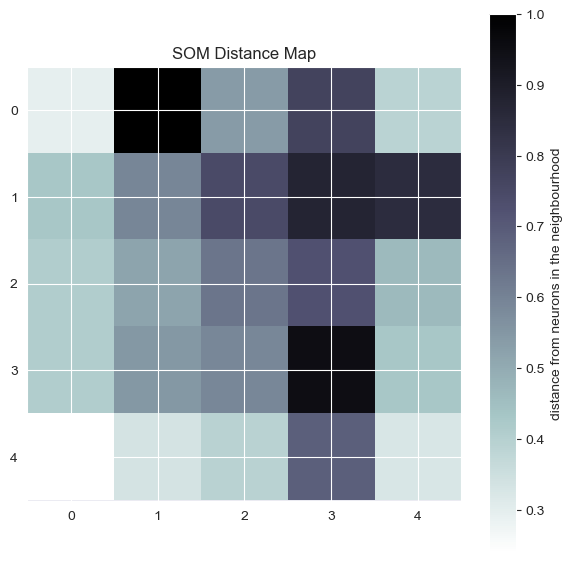

In [76]:
from minisom import MiniSom

# Assuming X_scaled is your preprocessed data
data = X_scaled

# Initialize SOM with dimensions 5x5 and input length equal to the number of features in the dataset
som = MiniSom(5, 5, data.shape[1], sigma=0.5, learning_rate=0.5)

# Train SOM on the data
som.train_random(data, 100)

# Visualize the SOM
plt.figure(figsize=(7, 7))
plt.imshow(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.title('SOM Distance Map')
plt.colorbar(label='distance from neurons in the neighbourhood')
plt.show()

In [77]:
# Initialize an empty list to store the SOM groups
som_groups = []

# Iterate over each data point
for x in data:
    # Find the winning neuron for the data point
    winner = som.winner(x)
    
    # Convert the coordinates of the winning neuron to a single number
    # This can be done by concatenating the coordinates and converting to an integer
    group = int(str(winner[0]) + str(winner[1]))
    
    # Append the group to the list of SOM groups
    som_groups.append(group)

# Add the SOM groups as a new column in the dataframe
df['SOM_Group'] = som_groups

df['SOM_Group'].value_counts()

2     4
44    3
10    3
31    3
22    3
33    2
34    2
41    2
11    1
30    1
1     1
Name: SOM_Group, dtype: int64

In [78]:
df.groupby('SOM_Group').mean(numeric_only=True)

,Pre-requisites,G:<11 S:4+,G:11 S:4+,G:12 S:4+,Workload,K-Means Cluster,DBSCAN_Cluster,Hierarchical_Cluster,GMM_Cluster,Spectral_Cluster
SOM_Group,,,,,,,,,,
1,1.000000,0.404214,0.389980,0.351092,7.796806,2.0,0.000000,8.000000,0.000000,5.0
2,0.250000,0.301933,0.274681,0.254347,6.818750,0.5,0.000000,8.000000,3.000000,3.5
10,1.333333,0.736710,0.710020,0.577776,8.027778,1.0,1.666667,1.333333,1.000000,2.0
11,0.000000,0.352689,0.332722,0.361141,8.750000,2.0,0.000000,8.000000,0.000000,5.0
22,0.000000,0.274215,0.362768,0.395120,7.644074,2.0,0.000000,8.000000,0.000000,5.0
30,5.000000,0.320713,0.282838,0.327673,10.222222,0.0,-1.000000,4.000000,7.000000,3.0
31,0.000000,0.522461,0.482989,0.425847,8.265000,2.0,0.000000,6.000000,4.000000,6.0
33,2.500000,0.253303,0.240314,0.216959,8.750833,0.0,0.000000,4.000000,5.000000,3.0
34,0.000000,0.401854,0.363088,0.343968,1.348056,2.0,1.000000,7.000000,6.000000,4.0


The clusters created by the SOM algorithm are not very meaningful. The clusters are not balanced and don't provide much insight into course selection. Thus I will not be using the SOM algorithm for my analysis.

## 7. Summary of Process

### 7.1 Business Problem
High school students across the nation aim to optimize their schedules to gain an advantage in college admissions and potentially reduce tuition costs by earning college credits in advance. While Advanced Placement (AP) courses offer this opportunity, the challenge is in selecting the right sequence of courses, given the varying workloads and prerequisites. The objective of this study is to derive a machine-learning model-based solution that maps out the most efficient AP schedule from freshman to senior year, which would maximize potential college credits while ensuring the workload is manageable and prerequisites are met.

### 7.2 Data Cleaning and Data Munging
The data cleaning and munging phase for this project involved several comprehensive steps to prepare the datasets for effective analysis. The primary dataset from the College Board required significant trimming to focus on relevant information. This involved the removal of extraneous details such as additional courses and demographic data not pertinent to the study. A notable challenge was the absence of AP scores for grades below 11th. To address this, I extrapolated these missing values by deducting the 11th and 12th-grade scores from the overall data. Additionally, the raw AP score figures were transformed into more insightful percentage formats by calculating the proportion of students achieving scores of 3, 4, or 5 relative to the total number of examinees.

The workload information datasets presented a more complex scenario, characterized by non-numeric data formats, numerous missing values, and inconsistencies across different sources. I converted the qualitative workload data into a quantifiable format and filled in missing entries by employing a hierarchical approach across multiple datasets. This method entailed initially extracting data from Dataset 2, then progressing to Datasets 3 and 4 if necessary. In cases where workload was expressed in terms of pages rather than time, a standard conversion of 2 minutes per page was applied, based on an average reading speed and word count per page.

The manual interpretation of data was occasionally required, particularly for courses like AP Calculus in Dataset 2, where exact workload figures were not uniformly available. For instance, the course workload was deduced based on the number of tests and quizzes outlined in the dataset. This extrapolation process established a baseline count of tests and quizzes for the academic year, with assumptions made for quarters where specific data points were missing.

The categorization of daily quizzes varied significantly across courses. To standardize this, I devised a scale ranging from 'None' to 'Daily,' correlating to a numerical range that encapsulated the frequency of these assessments.

Finally, the cleaned datasets were meticulously joined using the AP course name as a key identifier. This integration process combined AP test scores with corresponding workload data for each course. Rigorous efforts were made to ensure the final dataset was free of duplicates, which were methodically removed during the data preparation phase.

This comprehensive data cleaning and munging process laid the groundwork for subsequent exploratory data analysis and feature engineering, as detailed in Section 2.2.

## 8. Analysis Approach

### 8.1 Feature Engineering
In order to prepare the data for training the model, I engineered the following features:
1. Pass Rate: The percentage of students who passed the AP exam with a score of 4 or above as many colleges do not accept scores of 3 for college credit. Rather than creating a new column, I will simply drop the rows representing scores of 3, and 5. I will also drop all columns representing overall scores (G:ALL S:3+, G:ALL S:4+, G:ALL S:5) as they are redundant with the other columns.
2. Workload: The total expected weekly workload for the course, including reading, homework, major assignments, minor assignments, and tests. In order to calculate this I need to convert the major assignments, minor assignments, and tests into weekly work hours. I will do so as follows:
    - Minor Assignments: According to the Center for Learning & Teaching at Champlain College, estimates for common tasks such as a 250-word/one-paragraph post is around 30 minutes. This will be used for minor assignment time. To get the time for minor assignments, multiply the number of minor assignments by 0.5, then divide by 36 (the number of weeks in a school year) to get the weekly minor assignment time.
    - Major Assignments: According to Scribbr, a resource for academic writing, the average length of a high school essay is between 300 and 1000 words. The upper end of this range will be used to estimate the time for major assignments. Extrapolating from the minor assignments of 30 minutes per 250 words, 2 hours for a 1000 word essay representing a major assignment will be used. To get the time for major assignments, multiply the number of major assignments by 2, then divide by 36 (the number of weeks in a school year) to get the weekly major assignment time.
    - Tests: According to School Habits, an educational blog, the average student spends 30 minutes a day studying for a test, and each test requires about 5 days of studying. This means that each test requires 2.5 hours of studying. To get the time for tests, multiply the number of tests by 2.5, then divide by 36 (the number of weeks in a school year) to get the weekly test time.
3. Removal of the quiz column: Amount of quizzes a course has is not a good indicator of workload as quizzes can be daily, weekly, or monthly. This is not a good indicator of workload as a course with daily quizzes will have a much higher workload than a course with monthly quizzes. Further I cannot find any data on the actual workload of quizzes and thus cannot convert them into weekly time. Additionally as the source for the data is relatively small and the choice on weather or not to include quizzes is up to the teacher, the data is not reliable.
4. Removal of the attendance criticality column: This column is not a good indicator of workload as it is not a measure of workload but rather a measure of how critical it is to attend class. While this is an important factor when it comes to unforeseen circumstances that require one to miss class. The categorical nature of the data also makes it a poor fit for clustering algorithms.

References:
1. Center for Learning & Teaching at Champlain College. "Understanding and Estimating Instructional Time and Homework." https://clt.champlain.edu/kb/understanding-and-estimating-instructional-time-and-homework/
2. Scribbr. "How Long is an Essay? Guidelines for Different Types of Essay." https://www.scribbr.com/academic-essay/length/
3. School Habits. "How Long Should High School Students Study?" https://schoolhabits.com/how-long-should-high-school-students-study/

### 8.2 Modeling
I have used the following clustering algorithms to cluster the AP courses: K-Means, DBSCAN, Hierarchical Clustering, Gaussian Mixture Models, and Spectral Clustering. I have chosen these algorithms as they are all unsupervised clustering algorithms and thus do not require labeled data. Further, they are all relatively simple and efficient algorithms. I have also chosen these algorithms as they are all different types of clustering algorithms and thus will provide different insights into the data. While I believe clustering will be the best approach for this problem, I've identified another possible approach of using Self-Organized Maps (SOMs) which would output a two-dimensional map where each node represents a group of similar courses. Courses with similar features (like workload and success rates) will be closer on the map. I plant to explore this approach in the future.

### 8.3 Performance Evaluation

In evaluating the performance of the clustering models implemented in this study, a combination of quantitative and qualitative methods will be used. The primary objective is to ensure that the clusters identified are meaningful and actionable in the context of guiding AP course selection for high school students.

##### Quantitative Measures

1. Silhouette Measure: This metric provides an indication of how similar an object is to its own cluster compared to other clusters. A higher silhouette value implies that the object is well matched to its own cluster and poorly matched to neighboring clusters. In the context of this study, a high silhouette score would suggest that the AP courses within each cluster are more similar to each other than to courses in other clusters, validating the effectiveness of the clustering.
2. Sum of Squared Errors (SSE): This measure quantifies the variance within each cluster. By calculating the sum of the squared distances between each data point and its cluster's centroid, SSE provides a direct measure of cluster tightness. Lower SSE values indicate more cohesive clusters, which is desirable as it suggests that courses within each cluster are more similar to each other.

##### Qualitative Evaluation
Given the small dataset and the specific nature of the research question, manual evaluation plays a critical role in assessing the model's performance. This involves a detailed examination of the clusters to evaluate:

1. Cluster Balance: Ensuring that the distribution of courses across clusters is reasonable and not skewed towards one or a few clusters.
2. Identification of High-Workload Low-Success Rate Courses: A key objective is to identify clusters that represent courses with high workloads and lower success rates, as these are important for students to consider carefully or avoid.
3. Identification of Low-Prerequisite High-Success Rate Courses: For underclassmen, particularly freshmen, it's crucial to identify courses that are accessible (low prerequisites) and have a high likelihood of success (high success rates), with manageable workloads.
4. Identifications of High-Prerequisite High-Success Rate Courses: For upperclassmen, particularly seniors, it's important to identify courses that have high prerequisites and high success rates, as these are critical for college admissions and credit.
4. Groupings for different workloads and success rates: It's important to identify groupings of courses with different workloads and success rates. This is important as it provides more options for students who are not sure what they want to take.

These qualitative assessments will be juxtaposed with the quantitative measures to provide a comprehensive evaluation of the clustering models. The insights gained from this analysis will inform subsequent iterations of feature engineering and model refinement, with the ultimate goal of developing a robust tool for AP course selection that balances workload, success potential, and prerequisites.

## 8. Results

### 8.1 K-Means Clustering
The K-Means algorithm provided some initial insights by effectively separating courses based on prerequisites and success rates. However, its performance in discerning courses by workload was limited, resulting in clusters with similar workloads. Additionally, the cluster distribution was skewed, with one cluster containing more than double the courses of others. This skewness, attributed to the dataset's small size and lack of linear separability, highlights the algorithm's limitations in handling this specific data structure.

### 8.2 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
DBSCAN's performance was notable for creating distinct clusters, such as one with high workload and low success rate. However, the algorithm demonstrated severe imbalance, with one cluster containing a disproportionately large number of courses. A concerning aspect was its classification of high-workload courses as noise, suggesting limitations in capturing the full spectrum of the dataset. Adjustments in parameters like eps and min_samples did not yield significant improvements. Its silhouette score and SSE metrics were the lowest among the algorithms tested, indicating suboptimal clustering.

### 8.3 Hierarchical Clustering
Hierarchical clustering showed a marked improvement over K-Means in segmenting courses by workload, prerequisites, and success rates. Notably, it identified a cluster of outlier courses characterized by high workload and low success rate. The algorithm, however, still struggled with cluster balance. This imbalance, likely due to the dataset's small and uneven nature, limited the algorithm's utility in providing grade-specific course recommendations. The high-cluster version offered more nuanced groupings, beneficial for advanced grade levels, but still had limitations in forming smaller, meaningful clusters.

### 8.4 Gaussian Mixture Models (GMM)
GMM excelled in clustering courses by workload, prerequisites, and success rates, creating well-balanced clusters and identifying outlier courses with extreme characteristics. Its ability to generate more diverse groupings, ranging from low-workload moderate-success to moderate-workload moderate-success courses, provided a broader spectrum of options for student course selection. This versatility makes GMM a strong candidate for modeling, as evidenced by its second-best performance in silhouette score and SSE.

### 8.5 Spectral Clustering
Spectral clustering showed an improvement over several other algorithms in terms of balance but did not match the performance of GMM. Its primary limitation was in identifying courses that fit specific grade-level needs, an essential aspect of the study's objective. In silhouette score and SSE metrics, it ranked third, suggesting that while it formed coherent clusters, it did not capture the nuanced requirements of course selection for different grade levels.

### 8.6 Cluster Evaluation
When comparing SSE and silhouette scores, Hierarchical Clustering and GMM emerged as front runners. However, GMM demonstrated superior performance in balancing clusters and identifying grade-specific courses, making it more effective for practical application. Despite Hierarchical Clustering's strong quantitative metrics, GMM's ability to offer a wider range of course options and identify outliers makes it more suitable for addressing the study's objectives.

### 8.7 Self-Organized Maps (SOMs)
The clusters created by the SOM algorithm are not very meaningful. The clusters are not balanced and don't provide much insight into course selection. Thus I will not be using the SOM algorithm for my analysis.

### 9. Full Analysis

#### 9.1 EDA
In Section 4, "Exploratory Data Analysis," of my research, I conducted an in-depth examination of the dataset's distribution, outliers, and relationships between different features. This involved analyzing a range of variables, such as weekly reading and homework expectations, major and minor assignments, tests, prerequisites, and AP scores. The data distribution highlighted considerable variability across these features. For instance, I found that weekly reading expectations ranged from 0 to 5.83 hours and homework expectations from 0 to 10 hours, reflecting the diverse workload across AP courses.

Significantly, I identified outliers in several columns using the Z-score method. This was crucial in ensuring the robustness of the analysis by addressing potential skewing of results due to these extreme values.

Furthermore, I explored the relationships among different columns. The heatmap analysis revealed varying degrees of correlation among the features. A noteworthy finding was the positive correlation between weekly reading and homework expectations, which intuitively aligns with the understanding that courses with higher reading demands often have more homework.

In Section 7, "Feature Engineering," I focused on preparing the data for model training by engineering several features. This process involved deriving new features and removing irrelevant ones to improve the model's performance. For example, I calculated the 'Weekly Instructional Time' based on the number of major assignments and tests, offering a more accurate representation of students' workload. I also removed the quiz and attendance criticality columns, as they were either unreliable or not indicative of the workload.

The engineered features were designed to provide a clearer and more meaningful interpretation of the data. By transforming and refining the dataset, I aimed to enhance the model's predictive capabilities and ensure that it reflects the true complexity and nuances of the educational context.

References from my research include sources from Champlain College, Scribbr, and School Habits, which provided insights into instructional time, essay lengths, and study habits, respectively. These sources informed my approach to feature engineering and helped contextualize the data within the broader educational landscape. 

#### 9.2 Final Model
Below is the final model I used for my analysis. I chose the GMM algorithm as it performed the best in terms of balance and the ability to find the ideal courses for each grade level.

In [79]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=8, random_state=42)
model = gmm.fit_predict(X_scaled)

# Print the silhouette score and SSE
df_scores[df_scores['Model'] == 'GMM_Cluster']

,Model,Silhouette Score,SSE,Silhouette Score Rank,SSE Rank,Rank
2,GMM_Cluster,0.345982,106.081709,2.0,2.0,4.0


In [80]:
# Print the resultant clusters
df['GMM_Cluster'] = model
df.groupby('GMM_Cluster').mean(numeric_only=True)


,Pre-requisites,G:<11 S:4+,G:11 S:4+,G:12 S:4+,Workload,K-Means Cluster,DBSCAN_Cluster,Hierarchical_Cluster,Spectral_Cluster,SOM_Group
GMM_Cluster,,,,,,,,,,
0,0.200000,0.315909,0.362201,0.379519,7.895806,2.0,0.000000,8.000000,5.000000,15.600000
1,1.333333,0.736710,0.710020,0.577776,8.027778,1.0,1.666667,1.333333,2.000000,10.000000
2,3.500000,0.544102,0.446330,0.295331,6.895833,2.0,0.000000,3.000000,0.000000,44.000000
3,0.600000,0.310941,0.274526,0.248456,7.388667,0.4,0.000000,7.200000,3.400000,8.200000
4,0.000000,0.522461,0.482989,0.425847,8.265000,2.0,0.000000,6.000000,6.000000,31.000000
5,0.000000,0.183117,0.244746,0.264657,15.348889,0.0,2.000000,5.000000,1.000000,41.000000
6,0.666667,0.419601,0.371708,0.323291,2.358148,2.0,0.666667,5.666667,2.666667,37.333333
7,4.000000,0.240171,0.244779,0.268350,9.027778,0.0,-0.500000,4.000000,3.000000,31.500000


#### 9.3 Full Analysis
The objective of this study is to derive a machine-learning model-based solution that maps out the most efficient AP schedule from freshman to senior year, which would maximize potential college credits while ensuring the workload is manageable and prerequisites are met. Looking at the research question, "Can a machine learning model, using a dataset of AP exams' mean scores, workload, and prerequisites, effectively cluster AP courses into categories that enable the creation of an optimal sequence for high school students to maximize their potential for earning college credits?" My findings have concluded the answer is yes. The GMM algorithm was able to cluster the courses based on workload, prerequisites, and success rates. Further, it managed to create a group of outlier courses that have a very high workload and very low success rate. They are also much better balanced than the other algorithms, with the largest cluster having 5 courses. The results also provide valuable insights into course selection. There are groups with high pre-requisites and high success rates for later grades and low pre-requisite and high success rate courses for earlier grades. Importantly, there are also more in between groupings, courses that don't have much work but a moderate success rate and courses that have a moderate workload and a moderate success rate. This is important as it provides more options for students who are not sure what they want to take.

In conclusion, using the GMM algorithm, it is possible to cluster AP courses into categories that enable the creation of an optimal sequence for high school students to maximize their potential for earning college credits.
